# Linescale 3 Automatic Max/Graph Maker

The purpose of this script is to take the many csv files that the linescale has from recording a specific session, add them to one big table from the day (with timestamps), find the min/max of each, and graph all of them.

One current drawback is that all the files in the single DF must be the same HZ. Will update with a solution.

## 1) Importing the Data and Assigning to an Array

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import os
import time
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter

%matplotlib inline

In [2]:
# Make list of all filenames in directory

filenames = [f for f in listdir("/Users/refuc/Linescale 3 Automation") # Change directory to match where the files are located
             if isfile(join("/Users/refuc/Linescale 3 Automation", f))]

# Make dataframe from list
timestamp_files = pd.DataFrame(filenames)

# Show Header
timestamp_files.head()

0
0  10_12_53.CSV
1  10_13_50.CSV
2  10_15_02.CSV
3  10_16_26.CSV
4  10_17_16.CSV

In [3]:
# Make master dataframe with all measurements

df = pd.read_csv(filenames[0])
for i in range(len(filenames)-2):
    i = i + 1
    df2 = pd.read_csv(filenames[i])
    df2.columns[0]
    df[df2.columns[0]] = df2

df.head(10)

No.1          No.2          No.3          No.4          No.5  \
0      13.11.21      13.11.21      13.11.21      13.11.21      13.11.21   
1      10:12:53      10:13:50      10:15:02      10:16:26      10:17:16   
2    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz   
3   Trig=3.25kN   Trig=3.25kN   Trig=4.25kN   Trig=4.25kN   Trig=4.25kN   
4   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   
5      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec   
6   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   
7   Total=21sec   Total=21sec   Total=21sec   Total=21sec   Total=21sec   
8          2.60          3.65          3.62          2.98          4.02   
9          2.61          3.69          3.62          2.94          3.98   

           No.6          No.8          No.9         No.10         No.11  ...  \
0      13.11.21      13.11.21      13.11.21      13.11.21      13.11.21  ...   
1      10:17:54      10:19:03      10:20:13      10:21:22      10:22:20  ...   
2    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz  ...   
3   Trig=4.25kN   Trig=4.75kN   Trig=5.00kN   Trig=5.00kN   Trig=5.00kN  ...   
4   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN  ...   
5      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec  ...   
6   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec  ...   
7   Total=21sec   Total=21sec   Total=21sec   Total=21sec   Total=21sec  ...   
8          3.71          3.85          3.59          3.85          4.15  ...   
9          3.70          3.86          3.59          3.84          4.14  ...   

          No.56         No.57         No.58         No.59         No.60  \
0      13.11.21      13.11.21      13.11.21      13.11.21      13.11.21   
1      13:18:04      13:33:36      13:42:37      13:43:57      13:45:16   
2    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz   
3   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN   
4   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   
5      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec   
6   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   
7   Total=21sec   Total=21sec   Total=21sec   Total=21sec   Total=21sec   
8          4.31          3.87          3.90          3.66          3.87   
9          4.31          3.85          3.89          3.64          3.87   

          No.61         No.62         No.63         No.64         No.65  
0      13.11.21      13.11.21      13.11.21      13.11.21      13.11.21  
1      13:47:18      13:48:06      13:51:22      13:52:15      13:52:52  
2    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz    Speed=40Hz  
3   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN   Trig=6.00kN  
4   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN   Stop=0.00kN  
5      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec      Pre=6sec  
6   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec   Catch=15sec  
7   Total=21sec   Total=21sec   Total=21sec   Total=21sec   Total=21sec  
8          3.19          3.79          3.85          3.80          3.55  
9          3.10          3.80          3.86          3.78          3.56  

[10 rows x 64 columns]

In [4]:
# Rename rows to match description and parse out values
rename_dict = {0:"Date",
              1:"Time",
              2:"Speed (Hz)",
              3:"Trig",
              4:"Stop",
              5:"Pre",
              6:"Catch",
              7:"Total",
              }

df.rename(rename_dict, axis='index', inplace=True)

# Remove unnecessary wording from rows
df.replace(to_replace=r'Speed=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Trig=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Stop=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Pre=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Catch=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Total=',value='',regex=True, inplace=True)
df.replace(to_replace=r'Hz',value='',regex=True, inplace=True)

df.head(10)

No.1      No.2      No.3      No.4      No.5      No.6  \
Date        13.11.21  13.11.21  13.11.21  13.11.21  13.11.21  13.11.21   
Time        10:12:53  10:13:50  10:15:02  10:16:26  10:17:16  10:17:54   
Speed (Hz)        40        40        40        40        40        40   
Trig          3.25kN    3.25kN    4.25kN    4.25kN    4.25kN    4.25kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec      6sec      6sec   
Catch          15sec     15sec     15sec     15sec     15sec     15sec   
Total          21sec     21sec     21sec     21sec     21sec     21sec   
8               2.60      3.65      3.62      2.98      4.02      3.71   
9               2.61      3.69      3.62      2.94      3.98      3.70   

                No.8      No.9     No.10     No.11  ...     No.56     No.57  \
Date        13.11.21  13.11.21  13.11.21  13.11.21  ...  13.11.21  13.11.21   
Time        10:19:03  10:20:13  10:21:22  10:22:20  ...  13:18:04  13:33:36   
Speed (Hz)        40        40        40        40  ...        40        40   
Trig          4.75kN    5.00kN    5.00kN    5.00kN  ...    6.00kN    6.00kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN  ...    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec  ...      6sec      6sec   
Catch          15sec     15sec     15sec     15sec  ...     15sec     15sec   
Total          21sec     21sec     21sec     21sec  ...     21sec     21sec   
8               3.85      3.59      3.85      4.15  ...      4.31      3.87   
9               3.86      3.59      3.84      4.14  ...      4.31      3.85   

               No.58     No.59     No.60     No.61     No.62     No.63  \
Date        13.11.21  13.11.21  13.11.21  13.11.21  13.11.21  13.11.21   
Time        13:42:37  13:43:57  13:45:16  13:47:18  13:48:06  13:51:22   
Speed (Hz)        40        40        40        40        40        40   
Trig          6.00kN    6.00kN    6.00kN    6.00kN    6.00kN    6.00kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec      6sec      6sec   
Catch          15sec     15sec     15sec     15sec     15sec     15sec   
Total          21sec     21sec     21sec     21sec     21sec     21sec   
8               3.90      3.66      3.87      3.19      3.79      3.85   
9               3.89      3.64      3.87      3.10      3.80      3.86   

               No.64     No.65  
Date        13.11.21  13.11.21  
Time        13:52:15  13:52:52  
Speed (Hz)        40        40  
Trig          6.00kN    6.00kN  
Stop          0.00kN    0.00kN  
Pre             6sec      6sec  
Catch          15sec     15sec  
Total          21sec     21sec  
8               3.80      3.55  
9               3.78      3.56  

[10 rows x 64 columns]

As you can see, rows 0 through 7 are characteristics of the recording where 8 through last are the recordings. Let's add a min/max function and insert those values in the 8th and 9th row, respectively.

In [5]:
# Make min and max function
def max_min_reading(df, starting_row = 8):
    """ Take in dataframe and starting row to produce a maximum and minimum value for the readings
    
    Args:
        df (dataframe): Dataframe we are working with
        starting_row(int): row in the dataframe that the measurements start in (standard is 8)
    
    Returns:
        df_final (dataframe): Original dataframe with max and min value inserted after characteristics
    
    Raises:
        ValueError: the column provided must be an int
        
    Notes: 

    """
    # Raise error if month is not an integer or in 1-12
    if (not isinstance(starting_row, int)):
        raise ValueError('`month` must be an integer')
        
    max_reading = df.iloc[starting_row:].max()
    df_max = pd.DataFrame(max_reading).T
    df_max.rename({0:"Max"}, axis='index', inplace = True)
    min_reading = df.iloc[starting_row:].min()
    df_min = pd.DataFrame(min_reading).T
    df_min.rename({0:"Min"}, axis='index', inplace = True)
    
    df_final = pd.concat([df_max, df_min, df], )
    
    
    return df_final

df_final = max_min_reading(df)
df_final.head(15)

No.1      No.2      No.3      No.4      No.5      No.6  \
Max             4.04      4.16      5.16      5.13      4.39      5.43   
Min             2.52      2.15      1.92      2.16       2.7      2.15   
Date        13.11.21  13.11.21  13.11.21  13.11.21  13.11.21  13.11.21   
Time        10:12:53  10:13:50  10:15:02  10:16:26  10:17:16  10:17:54   
Speed (Hz)        40        40        40        40        40        40   
Trig          3.25kN    3.25kN    4.25kN    4.25kN    4.25kN    4.25kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec      6sec      6sec   
Catch          15sec     15sec     15sec     15sec     15sec     15sec   
Total          21sec     21sec     21sec     21sec     21sec     21sec   
8               2.60      3.65      3.62      2.98      4.02      3.71   
9               2.61      3.69      3.62      2.94      3.98      3.70   
10              2.61      3.73      3.61      2.89      3.94      3.68   
11              2.60      3.76      3.60      2.85      3.90      3.67   
12              2.60      3.80      3.59      2.81      3.85      3.65   

                No.8      No.9     No.10     No.11  ...     No.56     No.57  \
Max             5.24      5.76      5.38      5.08  ...      8.09      7.04   
Min             2.14      1.79      1.83      2.05  ...      1.58      1.78   
Date        13.11.21  13.11.21  13.11.21  13.11.21  ...  13.11.21  13.11.21   
Time        10:19:03  10:20:13  10:21:22  10:22:20  ...  13:18:04  13:33:36   
Speed (Hz)        40        40        40        40  ...        40        40   
Trig          4.75kN    5.00kN    5.00kN    5.00kN  ...    6.00kN    6.00kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN  ...    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec  ...      6sec      6sec   
Catch          15sec     15sec     15sec     15sec  ...     15sec     15sec   
Total          21sec     21sec     21sec     21sec  ...     21sec     21sec   
8               3.85      3.59      3.85      4.15  ...      4.31      3.87   
9               3.86      3.59      3.84      4.14  ...      4.31      3.85   
10              3.86      3.59      3.81      4.12  ...      4.31      3.83   
11              3.88      3.58      3.79      4.10  ...      4.30      3.81   
12              3.89      3.56      3.77      4.07  ...      4.29      3.81   

               No.58     No.59     No.60     No.61     No.62     No.63  \
Max             7.02      7.22      7.22      6.94      7.05       7.1   
Min             1.88      1.75      1.86      2.05      1.71       1.7   
Date        13.11.21  13.11.21  13.11.21  13.11.21  13.11.21  13.11.21   
Time        13:42:37  13:43:57  13:45:16  13:47:18  13:48:06  13:51:22   
Speed (Hz)        40        40        40        40        40        40   
Trig          6.00kN    6.00kN    6.00kN    6.00kN    6.00kN    6.00kN   
Stop          0.00kN    0.00kN    0.00kN    0.00kN    0.00kN    0.00kN   
Pre             6sec      6sec      6sec      6sec      6sec      6sec   
Catch          15sec     15sec     15sec     15sec     15sec     15sec   
Total          21sec     21sec     21sec     21sec     21sec     21sec   
8               3.90      3.66      3.87      3.19      3.79      3.85   
9               3.89      3.64      3.87      3.10      3.80      3.86   
10              3.89      3.61      3.87      3.03      3.81      3.86   
11              3.90      3.61      3.88      2.94      3.81      3.87   
12              3.88      3.61      3.88      2.87      3.83      3.87   

               No.64     No.65  
Max             6.92      6.84  
Min             1.91      1.88  
Date        13.11.21  13.11.21  
Time        13:52:15  13:52:52  
Speed (Hz)        40        40  
Trig          6.00kN    6.00kN  
Stop          0.00kN    0.00kN  
Pre             6sec      6sec  
Catch          15sec     15sec  
Total          21sec     21sec  
8               3.

## Must Create Separate Dataframes based on log speed.

Cannot make proper plots if dataframes have different speeds. This should clean that up and allow for all speeds.

In [6]:
# Use Speed row to determine and separate based off of value. Possible values are 10, 40, 640, 1280. 
# These are in object format and not string format and cannot be changed (easily).

hz_10_data = []
hz_40_data = []
hz_640_data = []
hz_1280_data = []

for i in df_final.columns:
    if df_final[i]['Speed (Hz)'] == '10':
        hz_10_data.append(df_final[i])
    elif df_final[i]['Speed (Hz)'] == '40':
        hz_40_data.append(df_final[i])
    elif df_final[i]['Speed (Hz)'] == '640':
        hz_640_data.append(df_final[i])
    elif df_final[i]['Speed (Hz)'] == '1280':
        hz_1280_data.append(df_final[i])
    else:
        break
        
# Do for all Hz.
df10 = pd.DataFrame(hz_10_data).T
df40 = pd.DataFrame(hz_40_data).T
df640 = pd.DataFrame(hz_640_data).T
df1280 = pd.DataFrame(hz_1280_data).T

We have to make a separate dataframe for plotting. This includes an accurate seconds column based on the Hz readind.

In [7]:
# Make function for converting hz to seconds
def hz_to_sec(df, hz):
    """ Take in dataframe and starting row to produce a maximum and minimum value for the readings
    
    Args:
        df (dataframe): Dataframe we are working with
        hz(int): specified hz
    
    Returns:
        df_nums (dataframe): Original dataframe with max and min value inserted after characteristics
    
    Raises:
        ValueError: the column provided must be an int
        
    Notes: 

    """ 
    df_nums = df.iloc[10:]
    df_nums = df_nums.astype('float')
    df_nums.reset_index(inplace = True)
    df_nums['index'] = df_nums['index']/hz
    df_nums.rename({'index' : 'Seconds'}, axis = 1, inplace = True)
    
    return df_nums

# Do for all Hz.
nums10 = hz_to_sec(df10, 10)
nums40 = hz_to_sec(df40, 40)
nums640 = hz_to_sec(df640, 640)
nums1280 = hz_to_sec(df1280, 1280)

## Make a function to plot every column vs. time

In [8]:
def plot_kN(df_final, df_nums, col):
    """ Take in dataframe and column to produce graph of section
    
    Args:
        df_final (dataframe): Dataframe we are working with (final, with labels)
        df_nums (dataframe): Dataframe we are workign with (final, only numbers, formatted)
        col (str): column name
    
    Returns:
        plotted column
    
    Raises:

        
    Notes: 
           
    
    """  
    # Plot kN vs time
    fig = plt.figure(figsize = [16,12])
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(df_nums['Seconds'], df_nums[col])

    # Plot max point
    ax1.plot(df_nums.iloc[df_nums[col].idxmax()][0], df_nums[col].max(), marker = (5,2), color = 'r')

    # Set Title
    ax1.set_title("Day: {0}, Time: {1}, Max: {2}".format(df_final[col]['Date'], df_final[col]['Time'], 
                                                         str(df_final[col]['Max']) + "kN"), fontweight="bold", fontsize=17)

    # Set Axis
    ax1.set_xlabel("Time (s)", fontweight="bold", fontsize=15)
    ax1.set_ylabel('Force (kN)', fontweight="bold", fontsize=15)

    # Clean Graph
    ax1.spines["top"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["right"].set_visible(False)


    return plt.show()

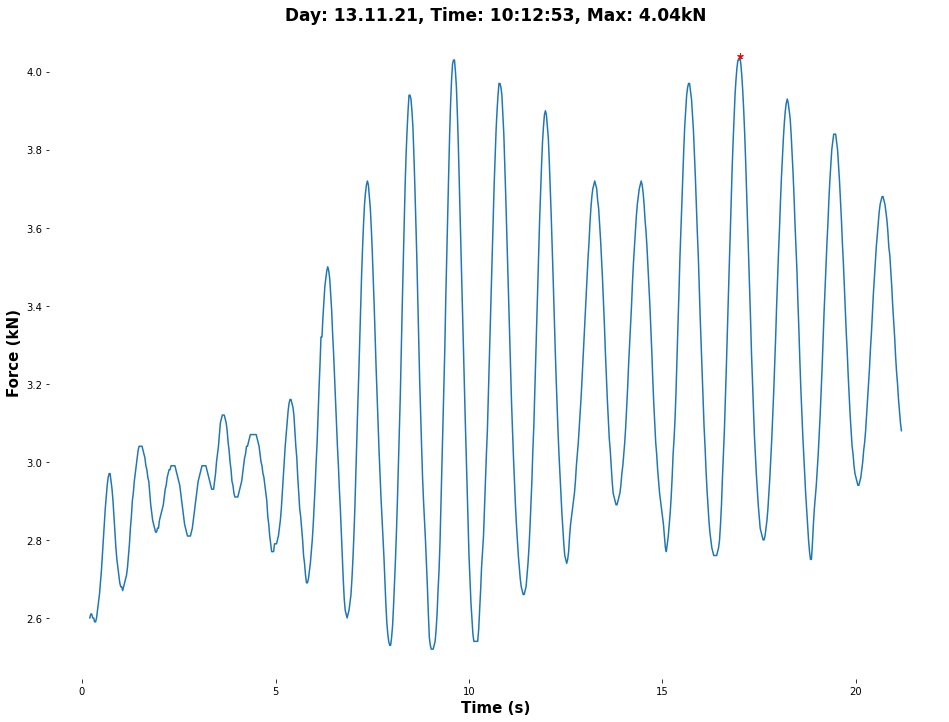

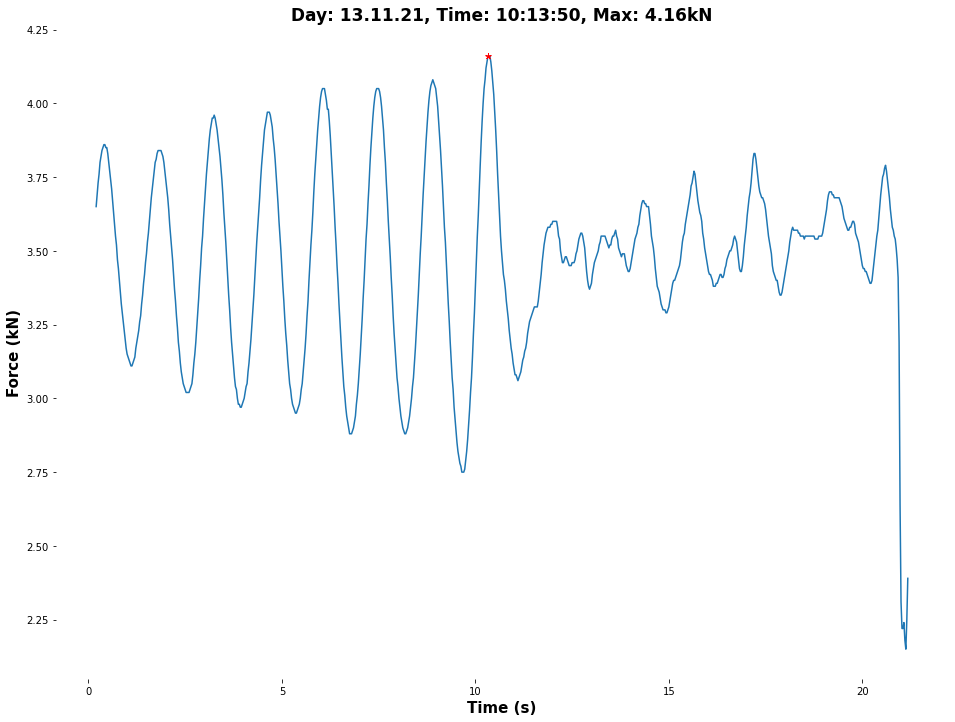

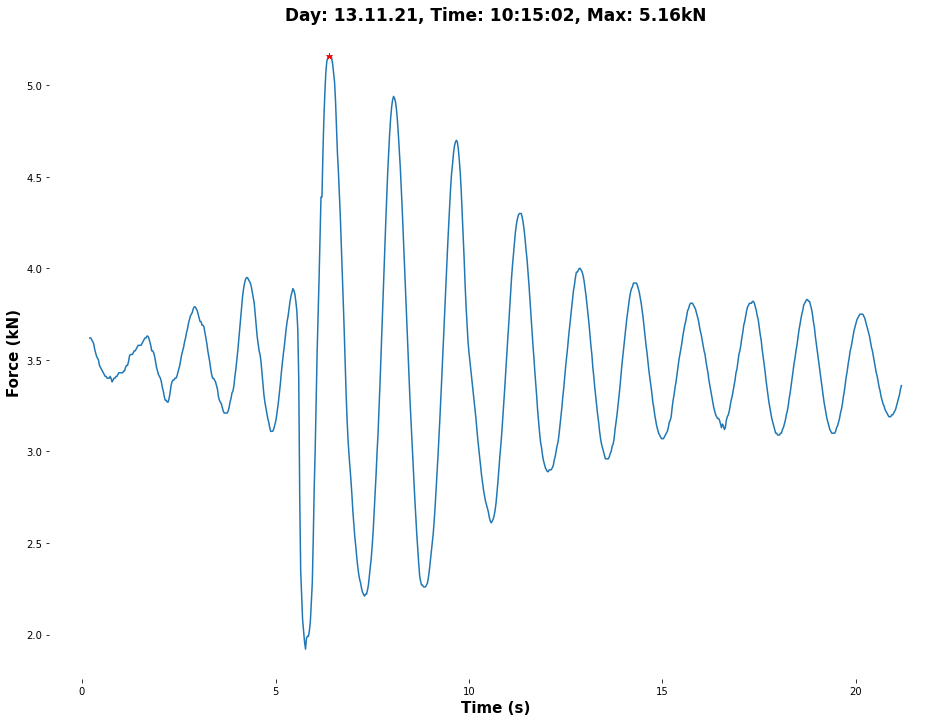

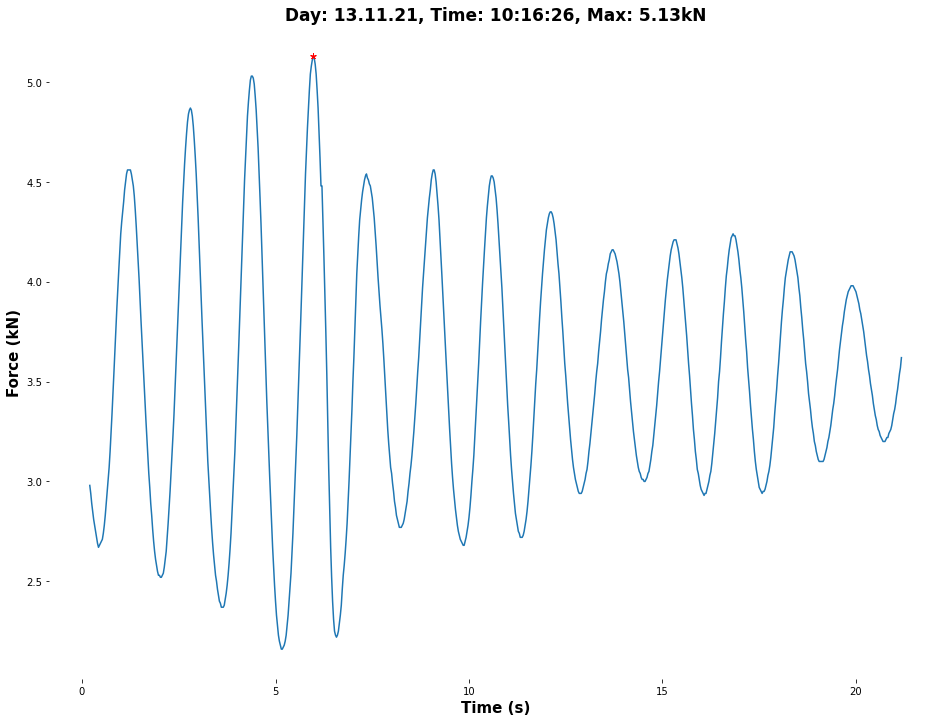

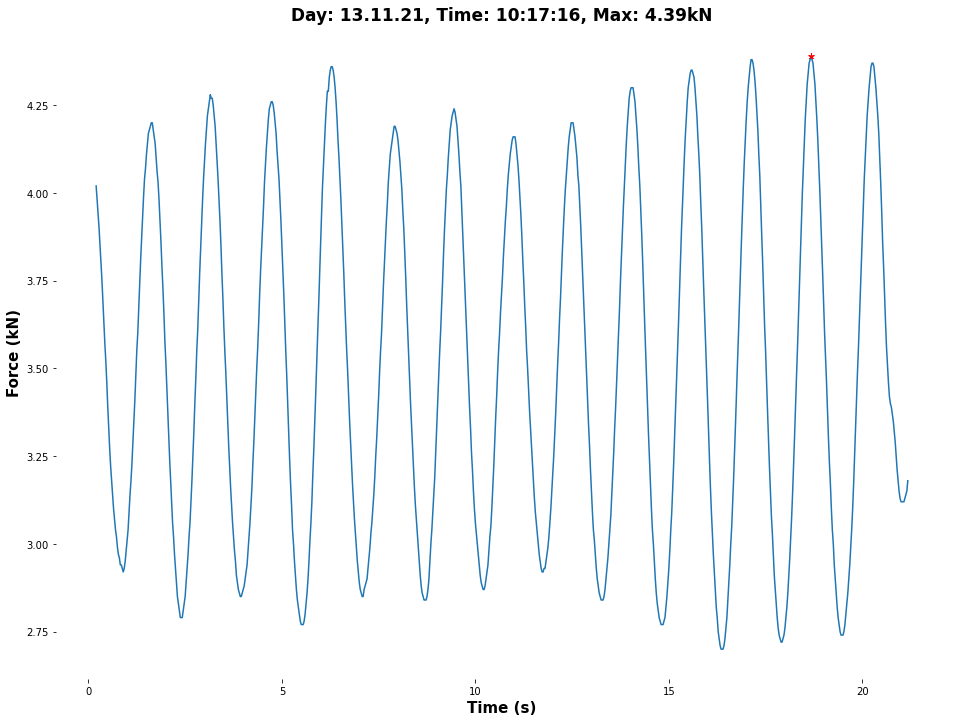

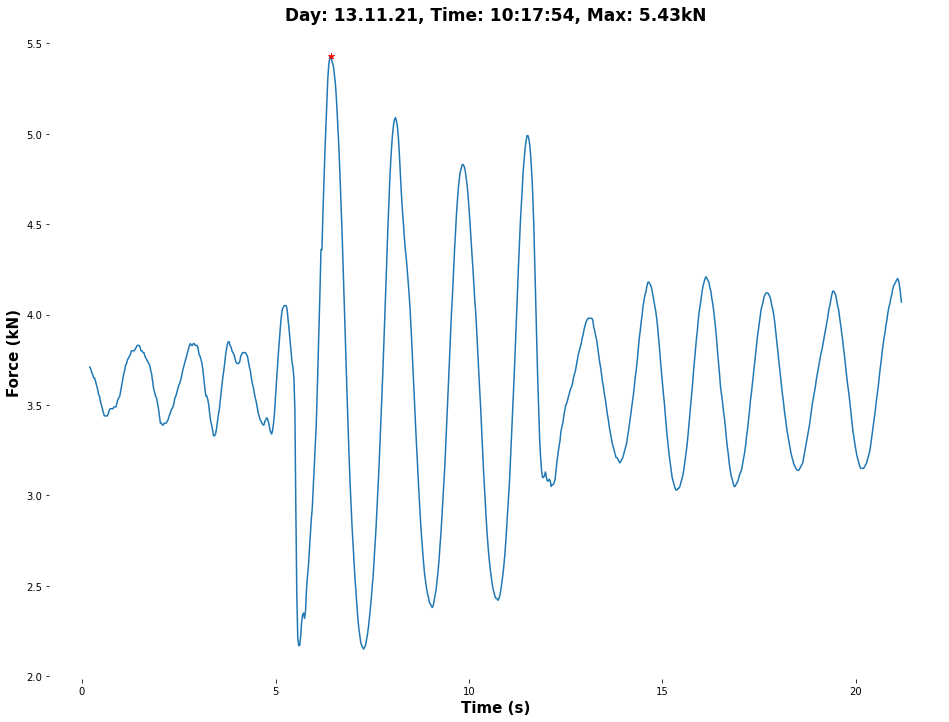

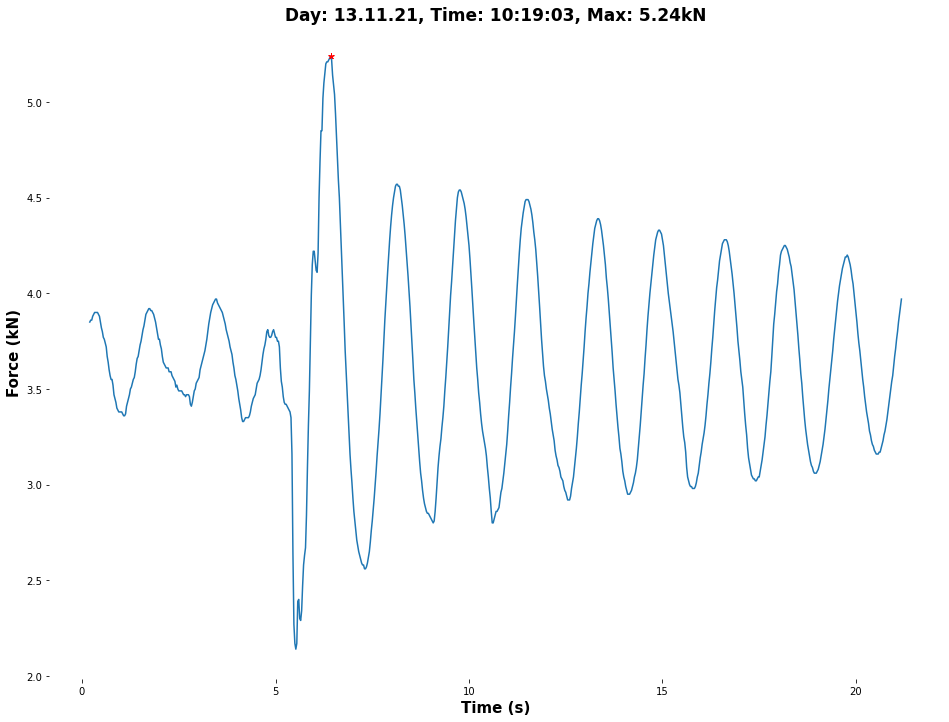

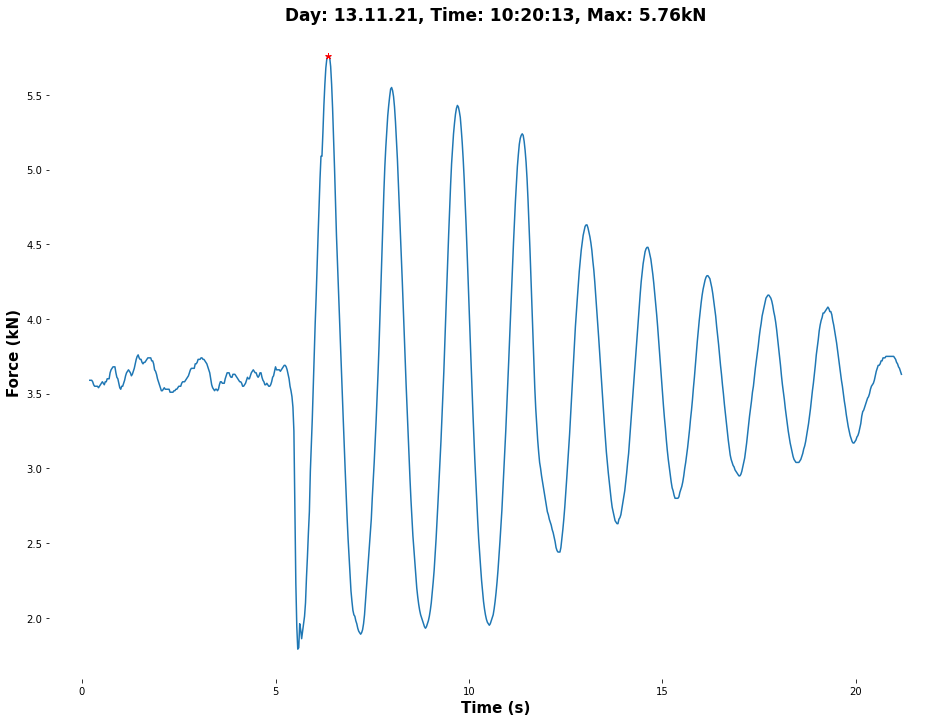

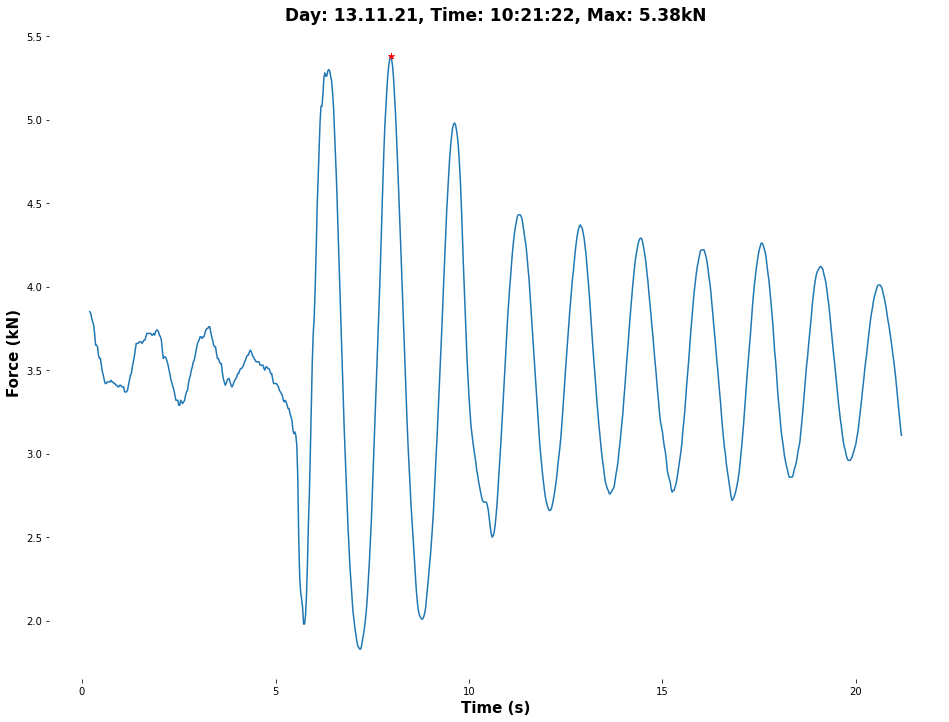

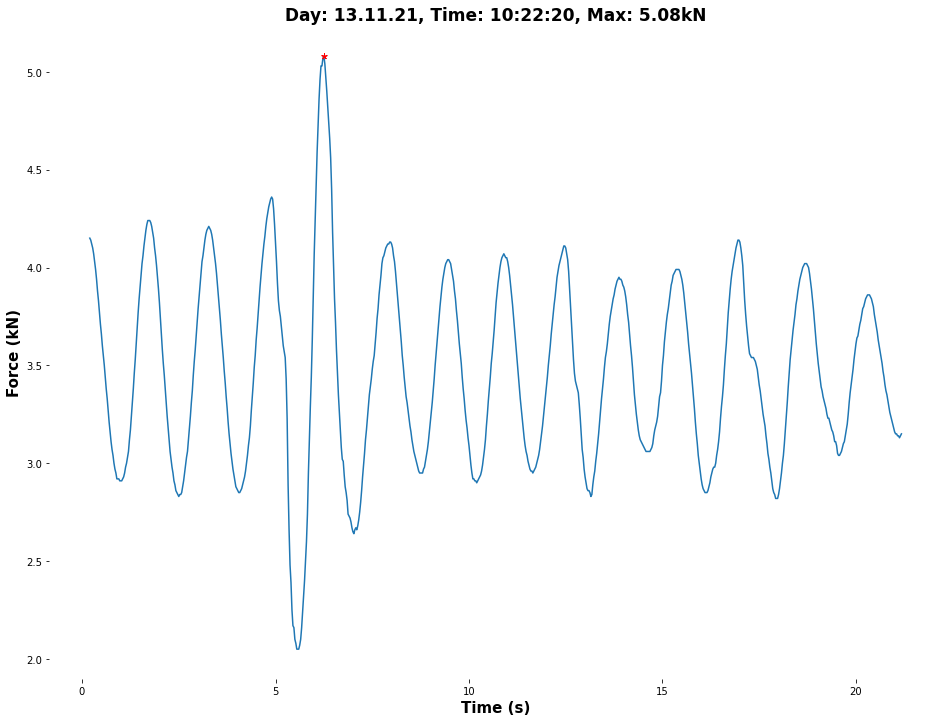

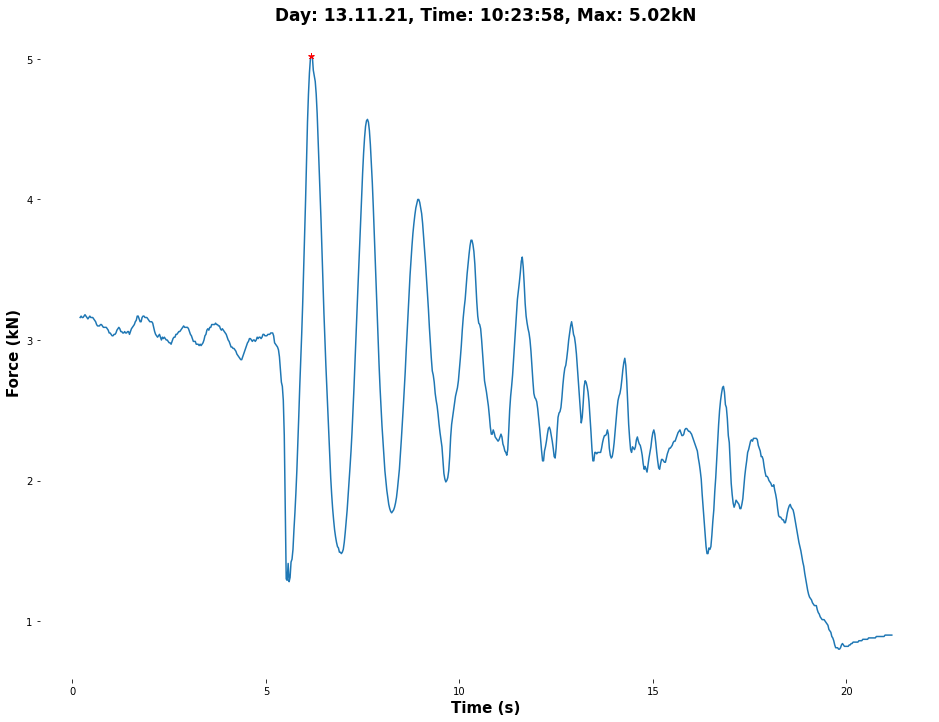

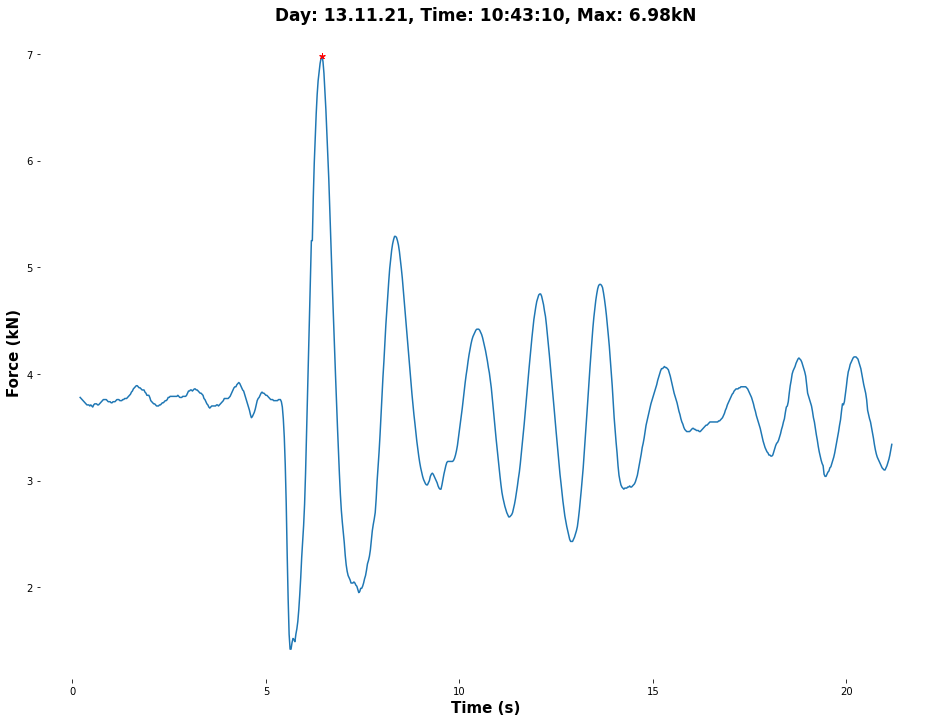

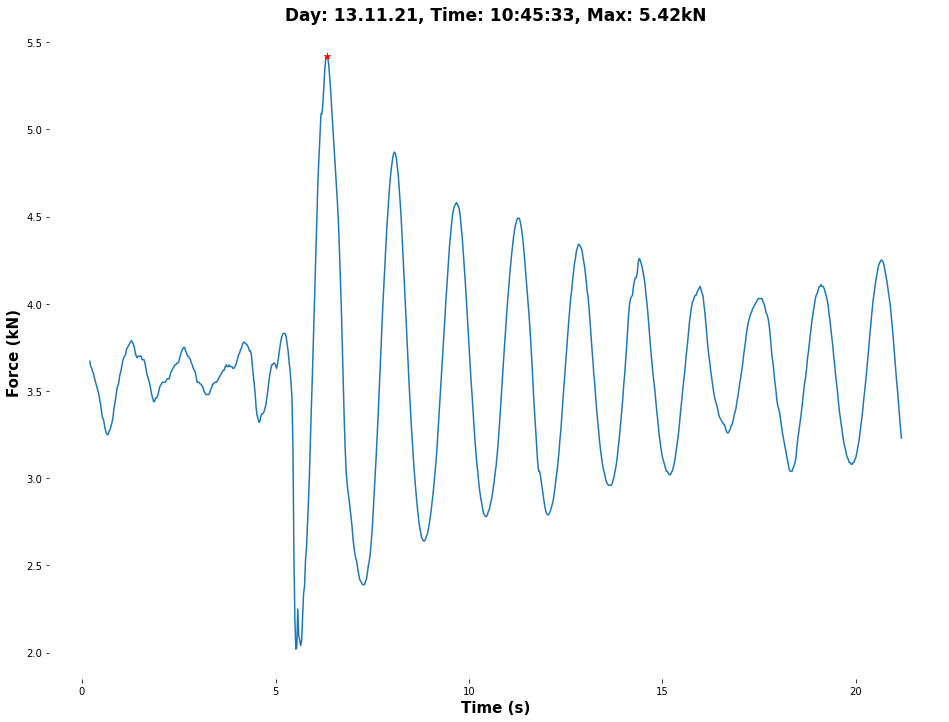

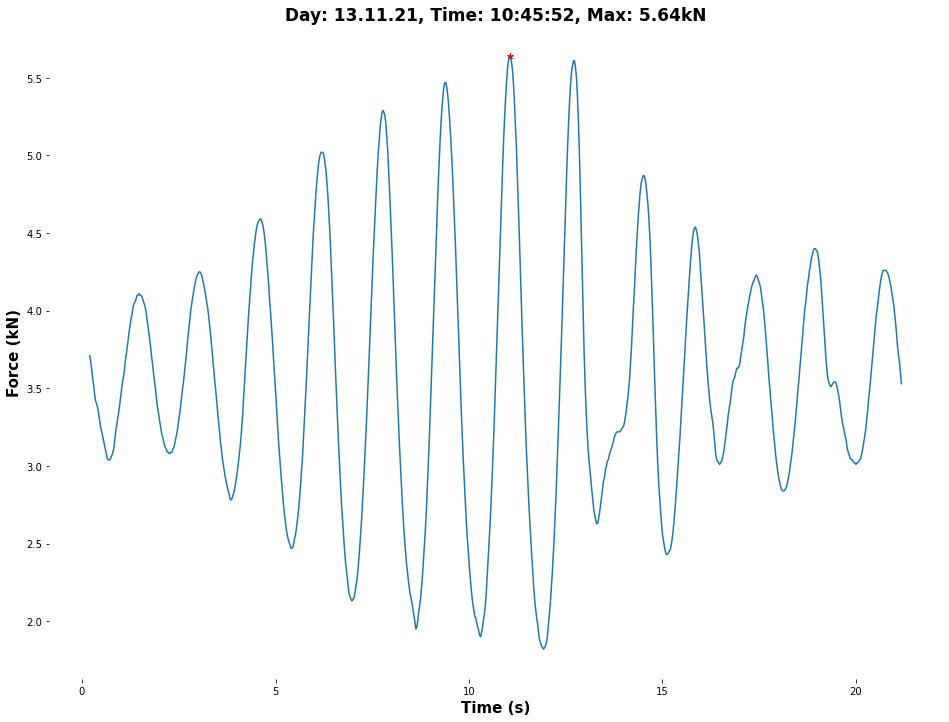

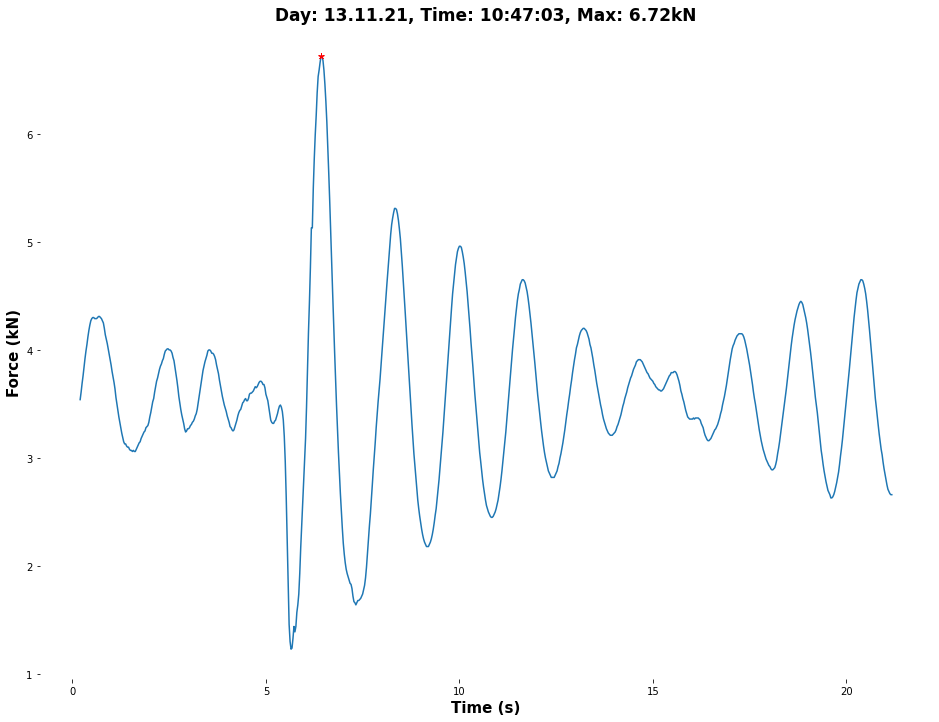

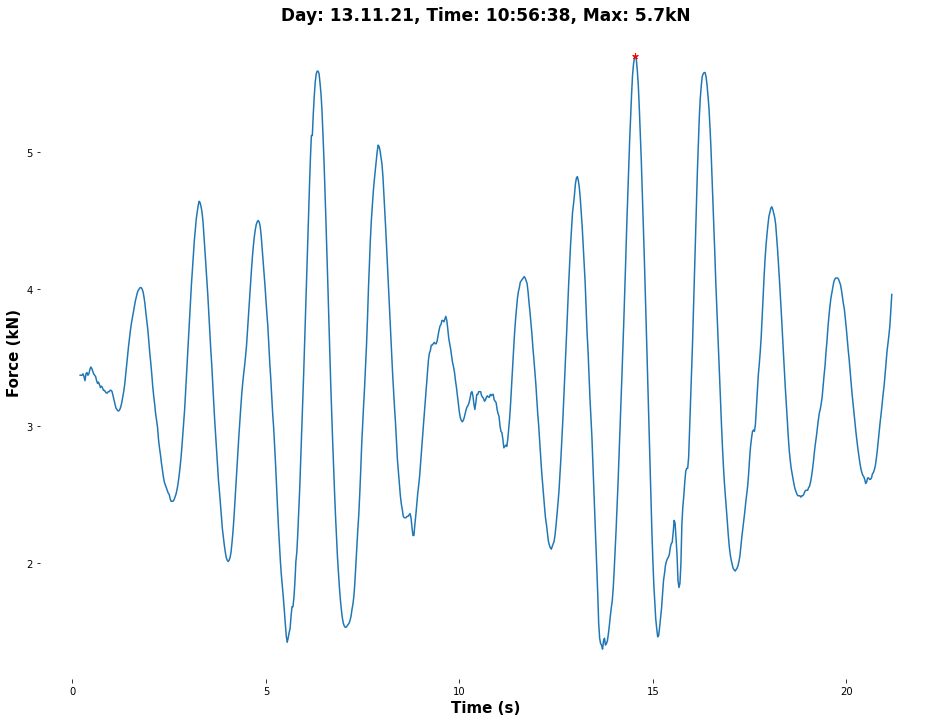

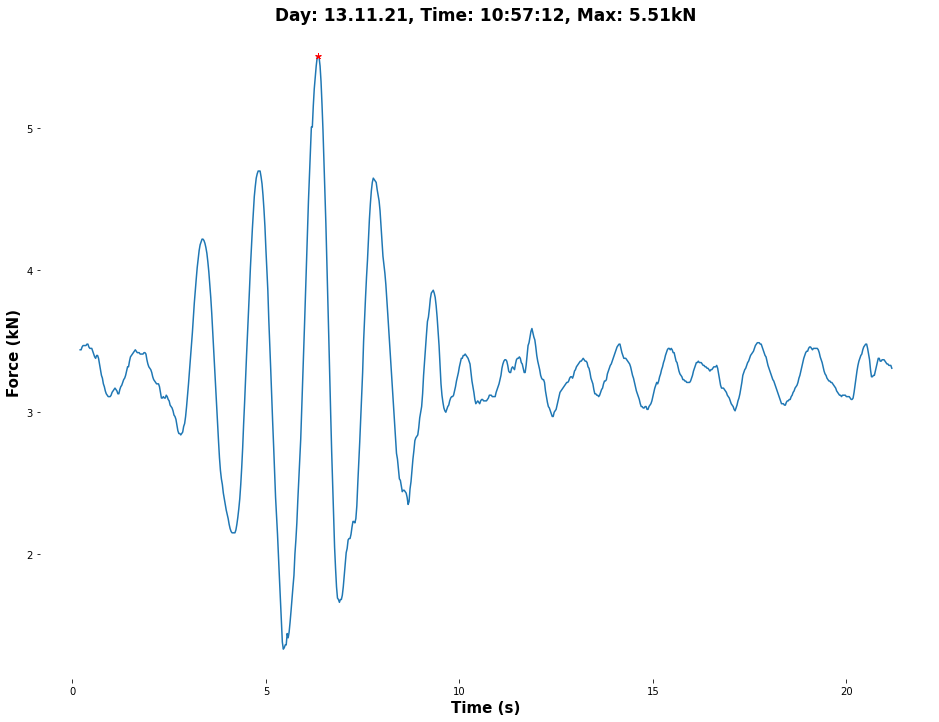

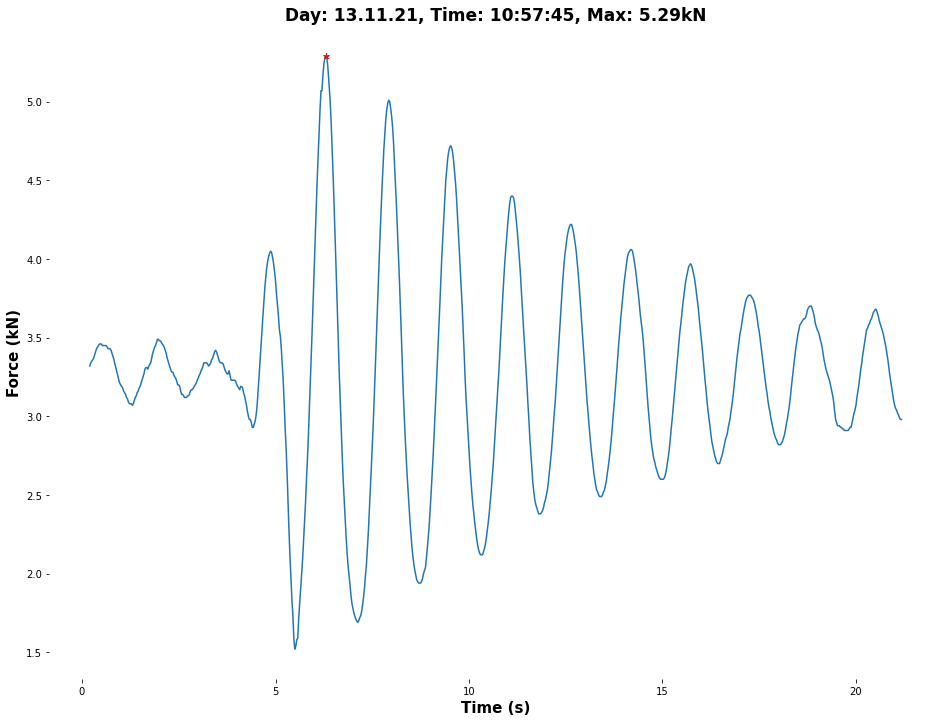

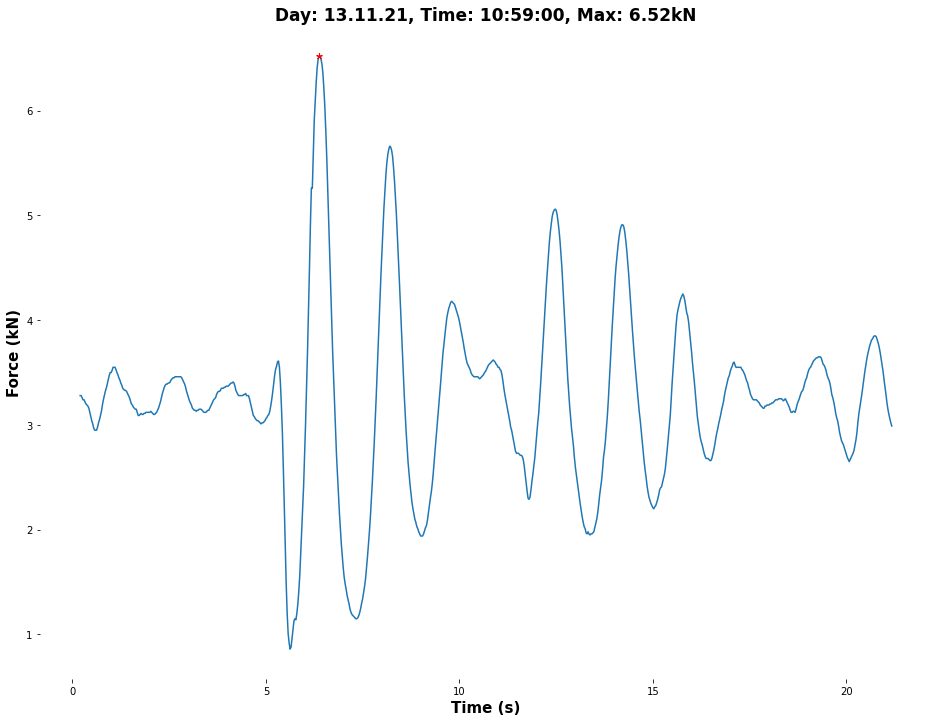

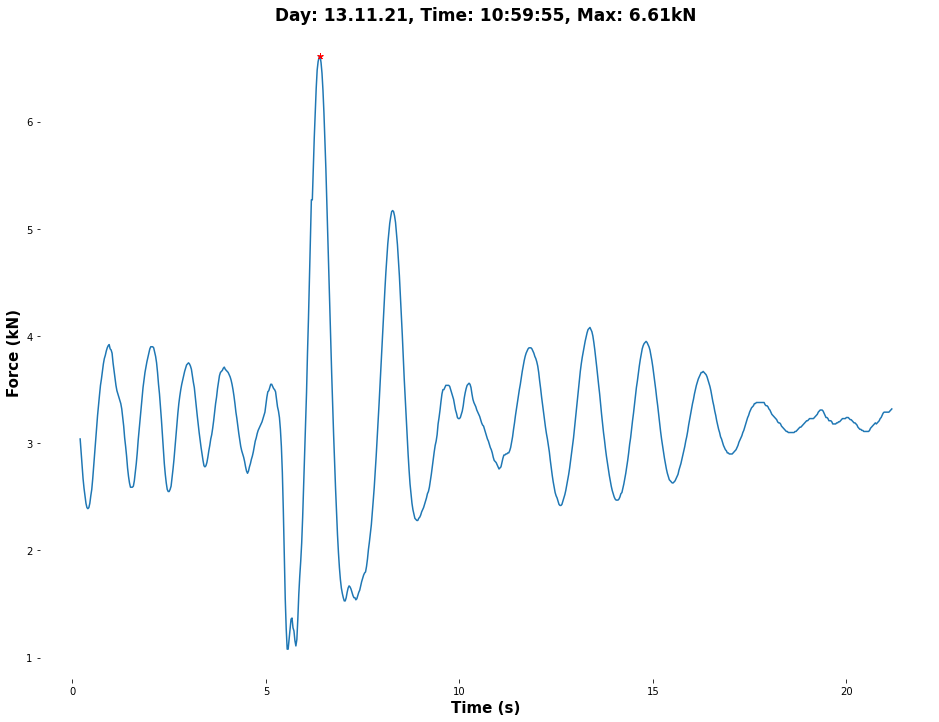

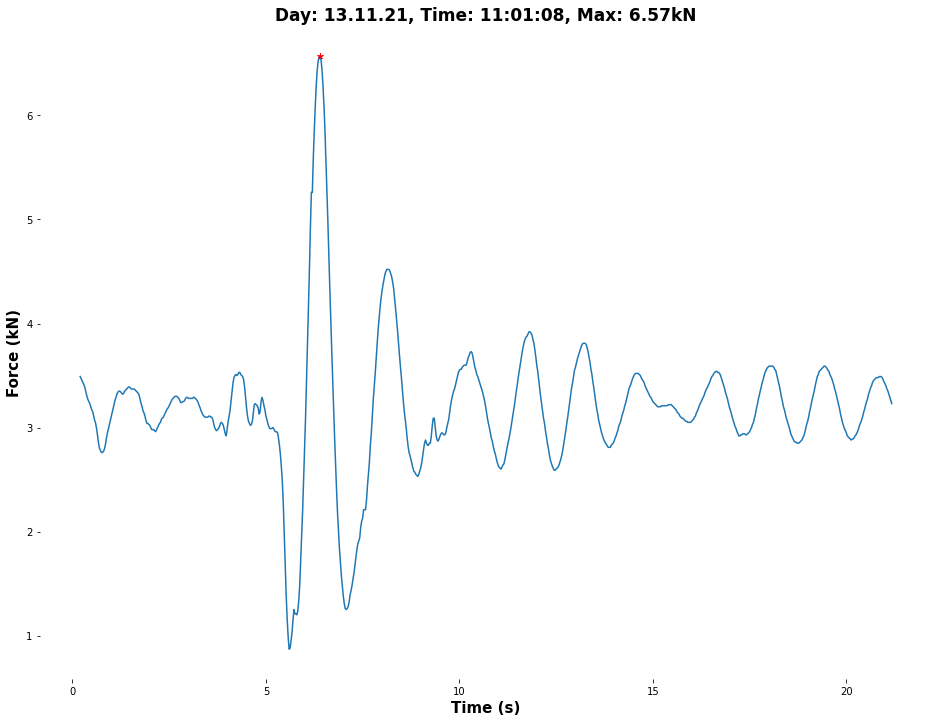

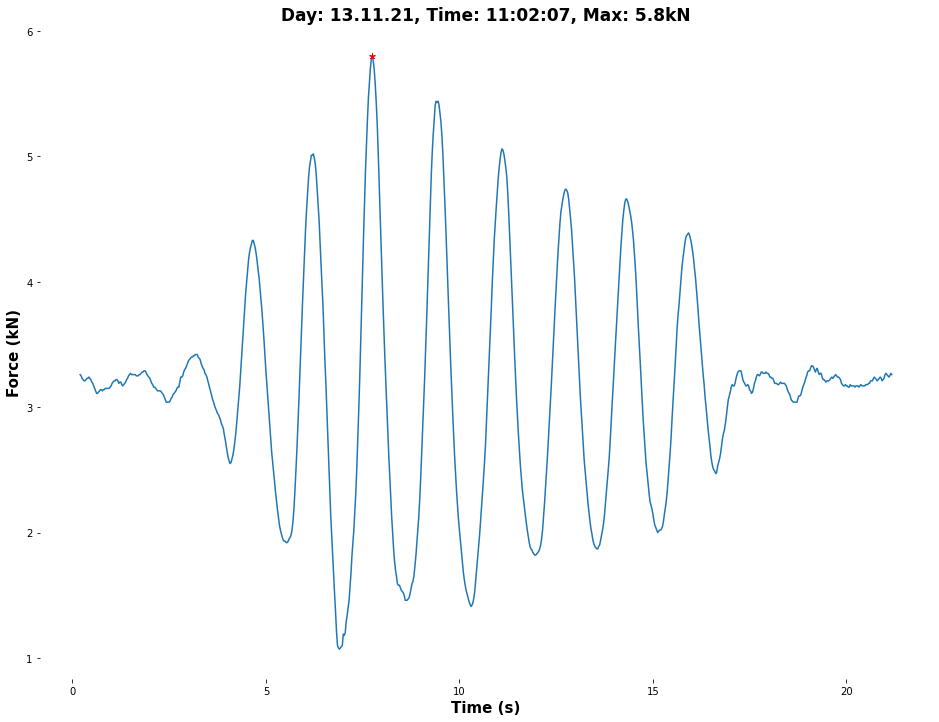

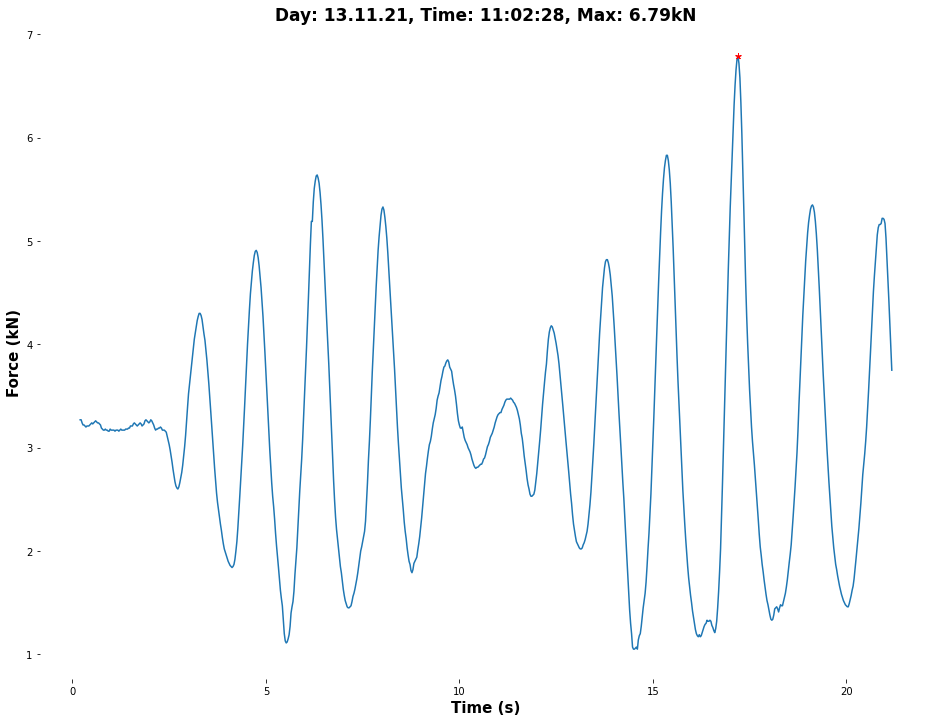

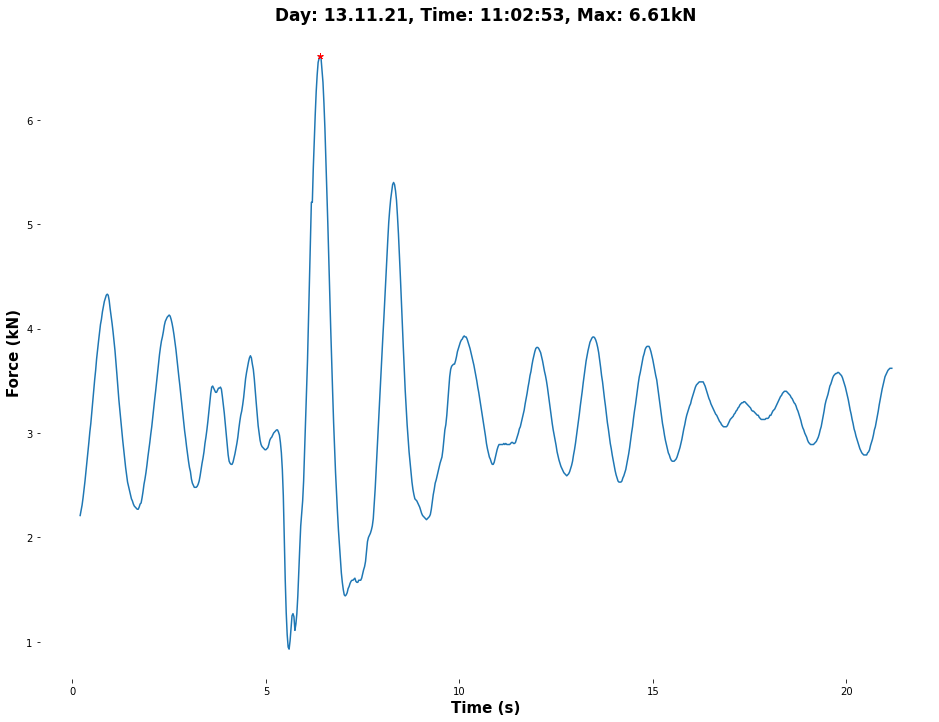

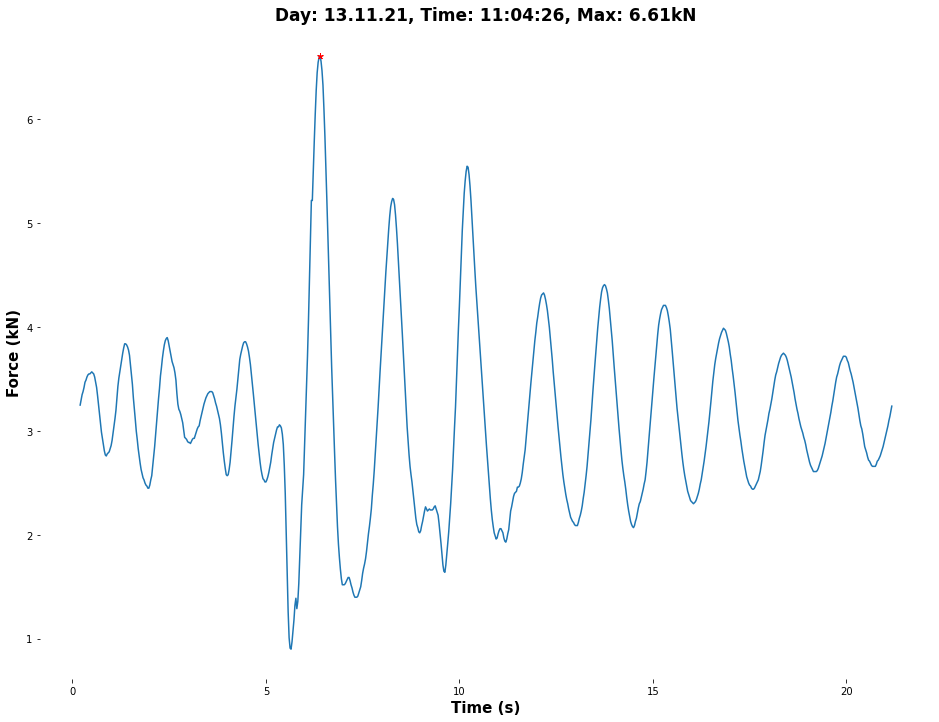

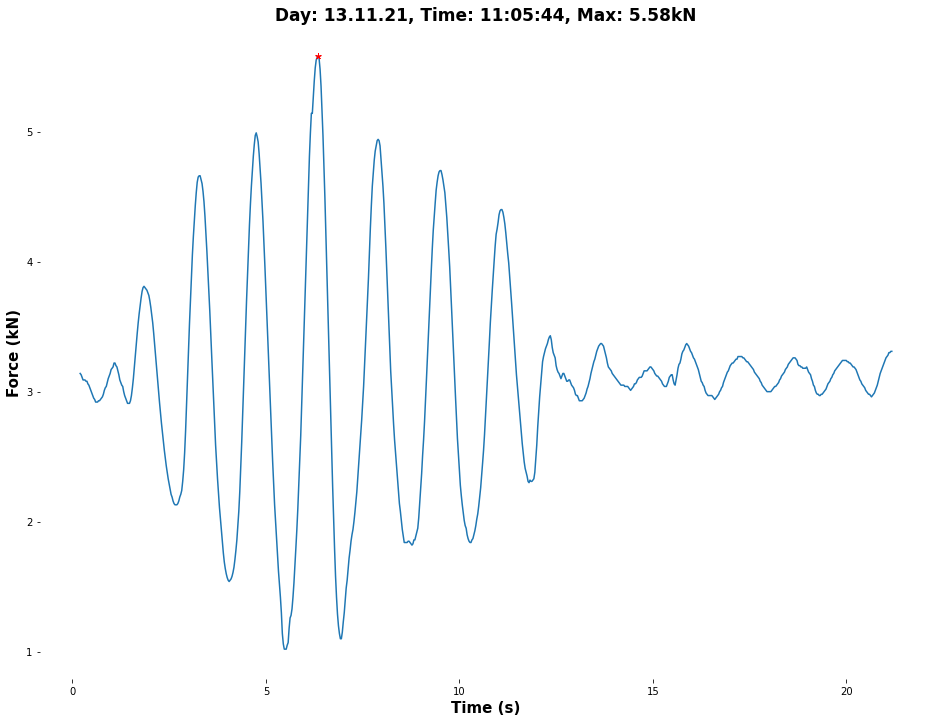

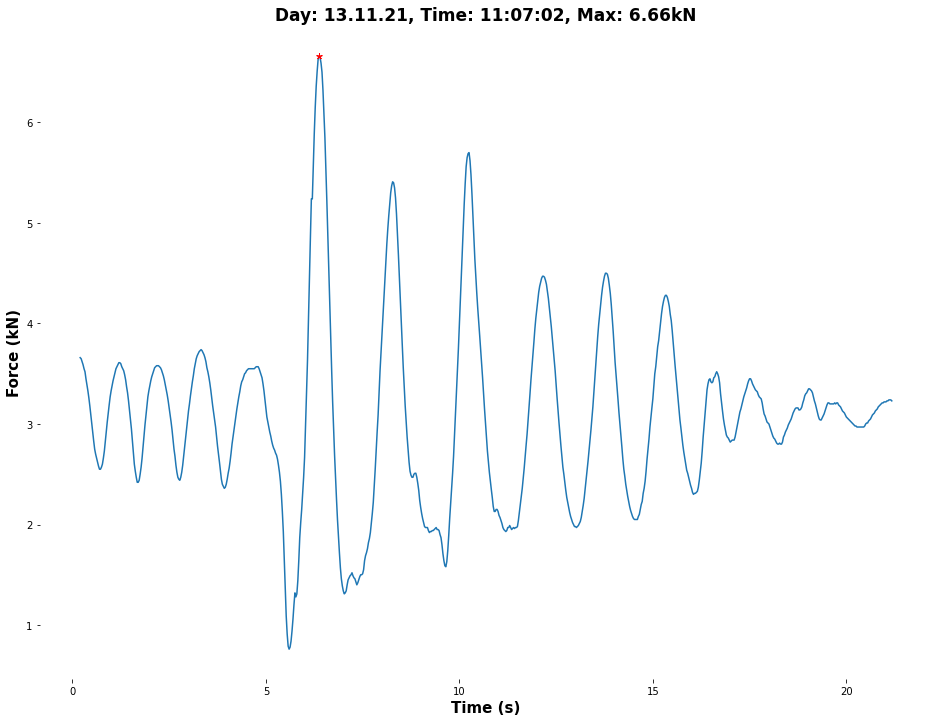

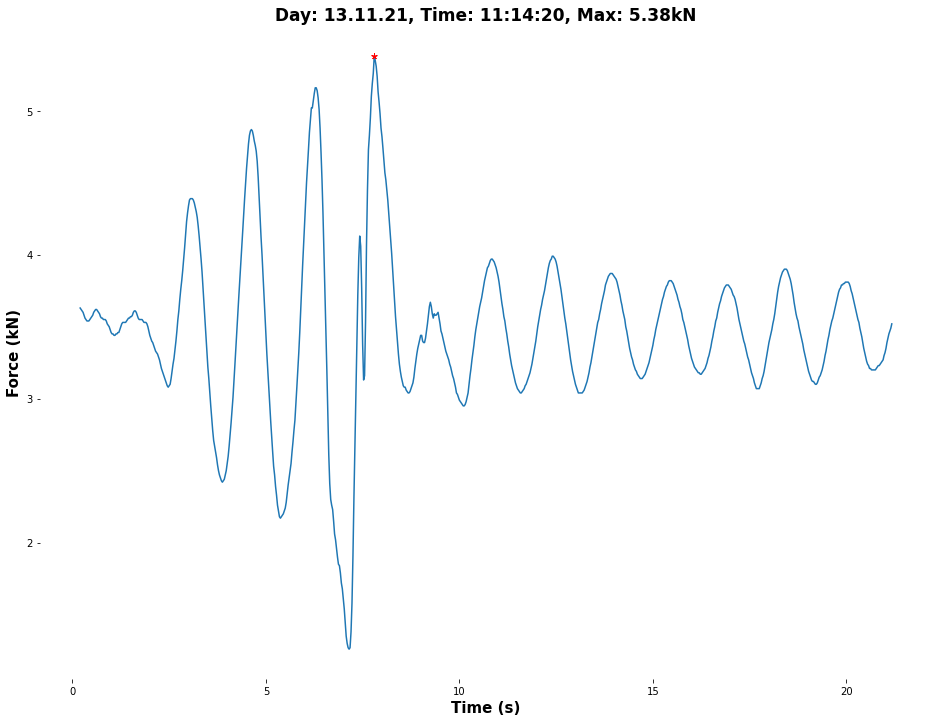

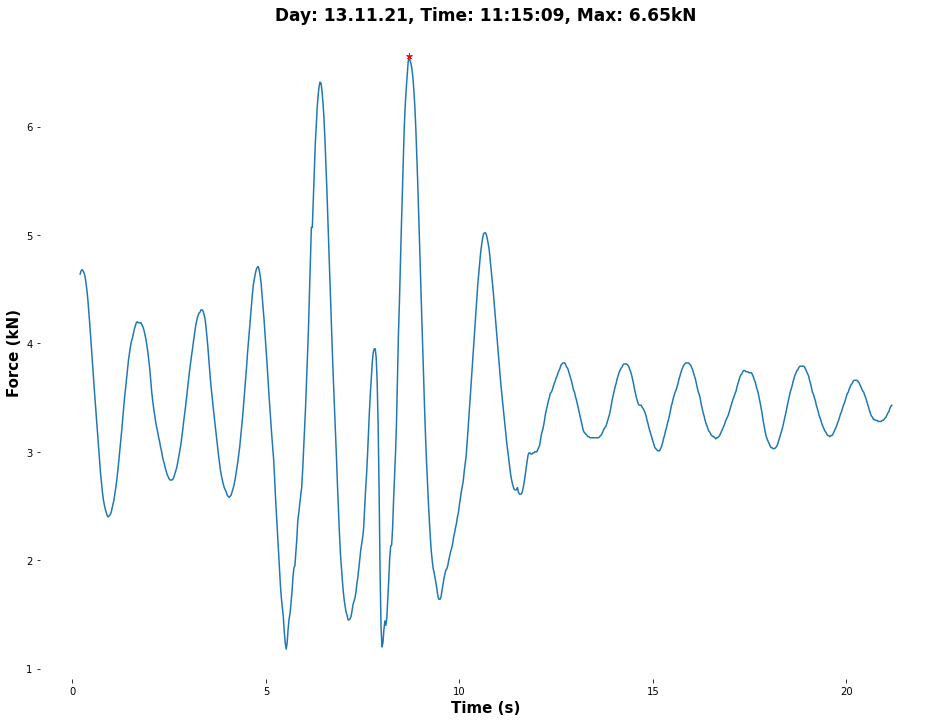

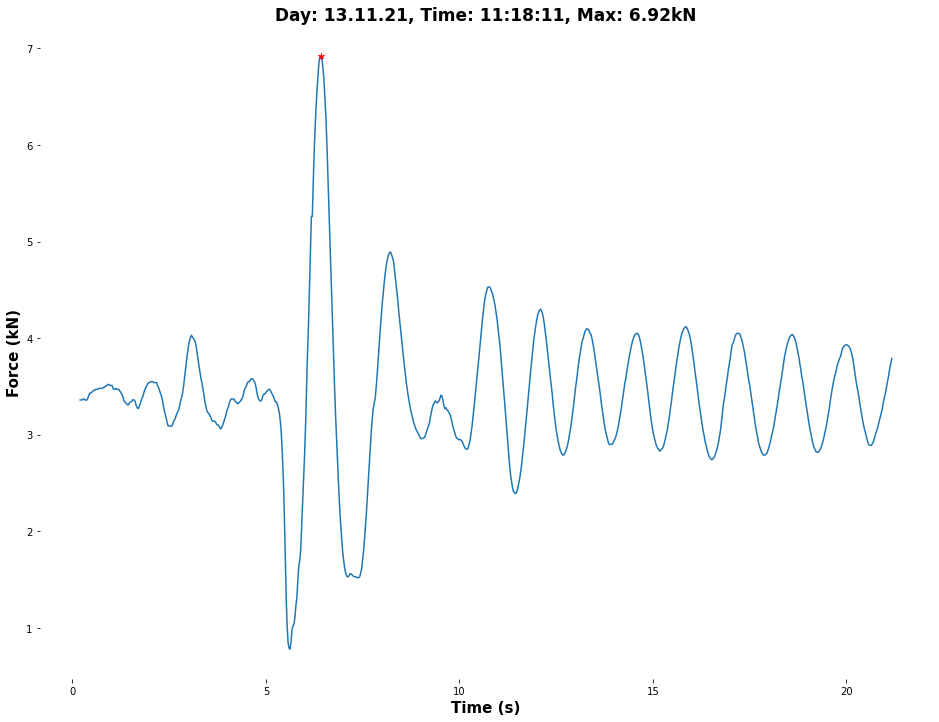

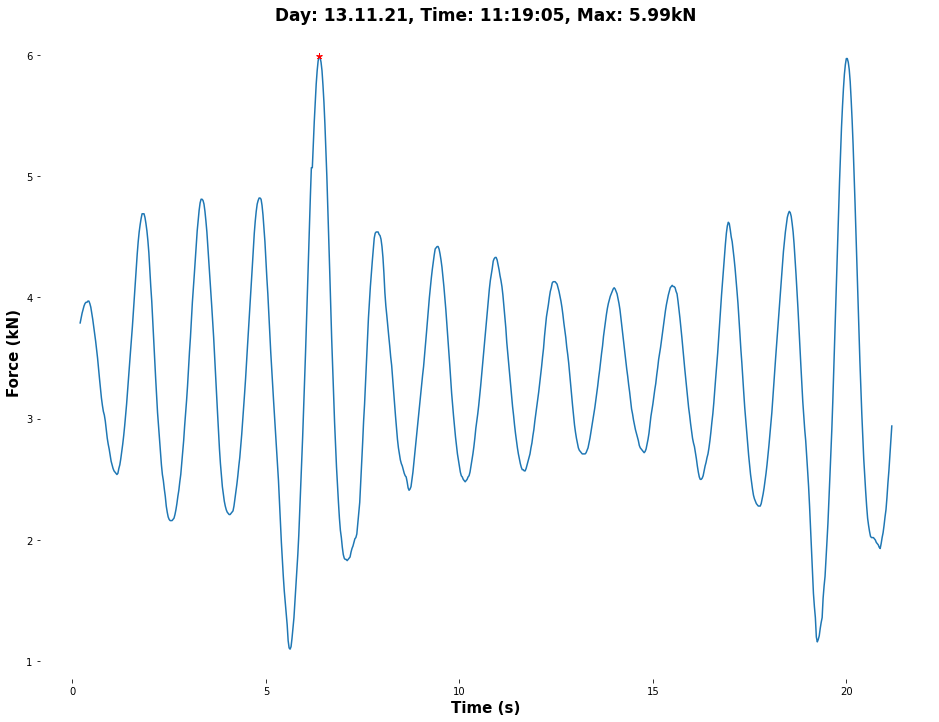

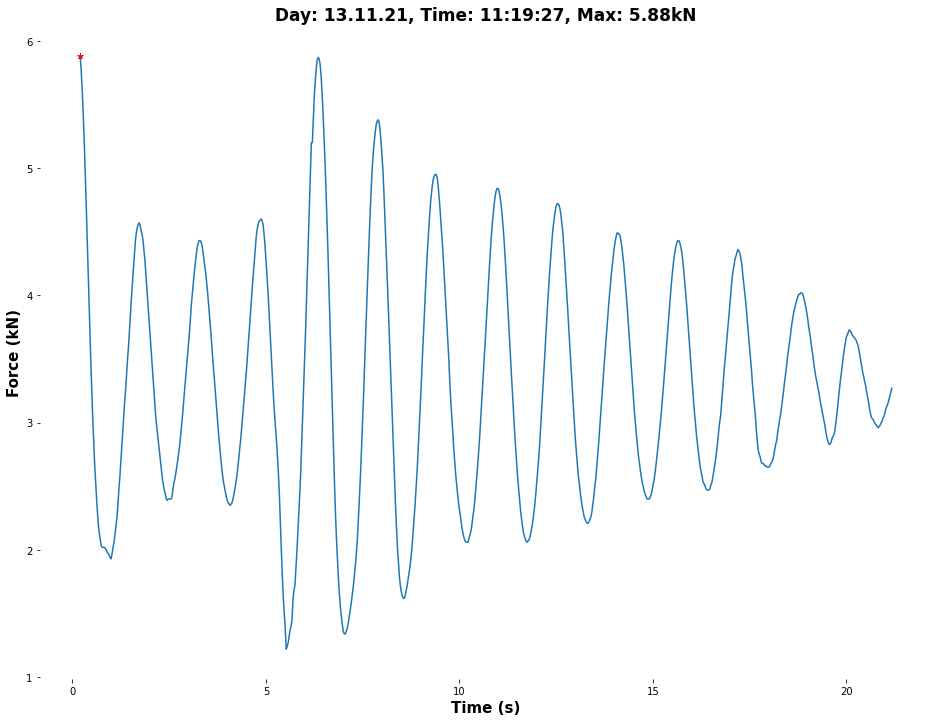

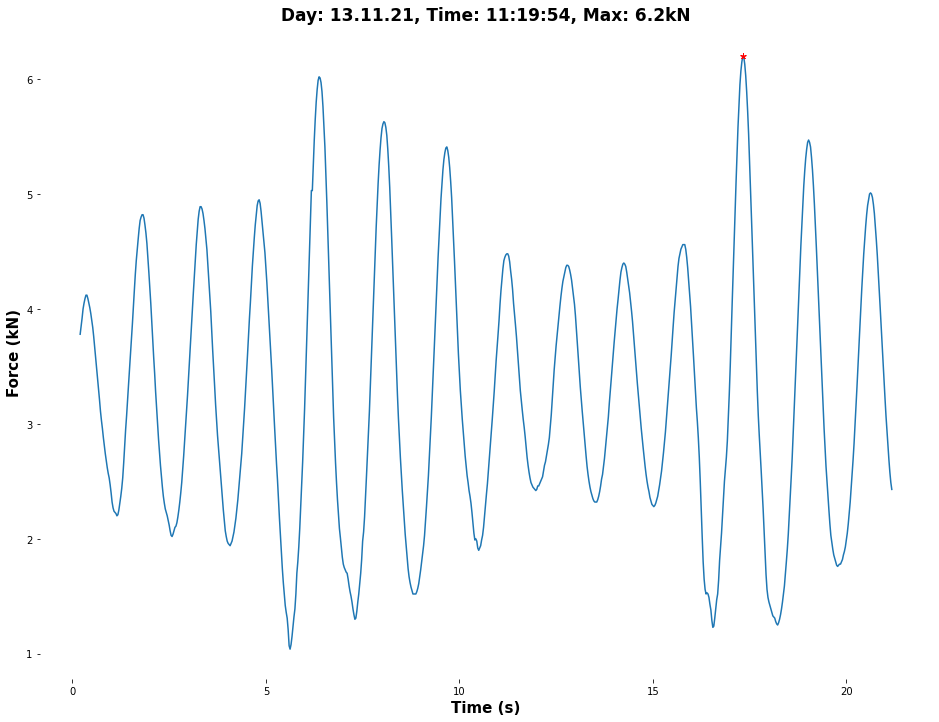

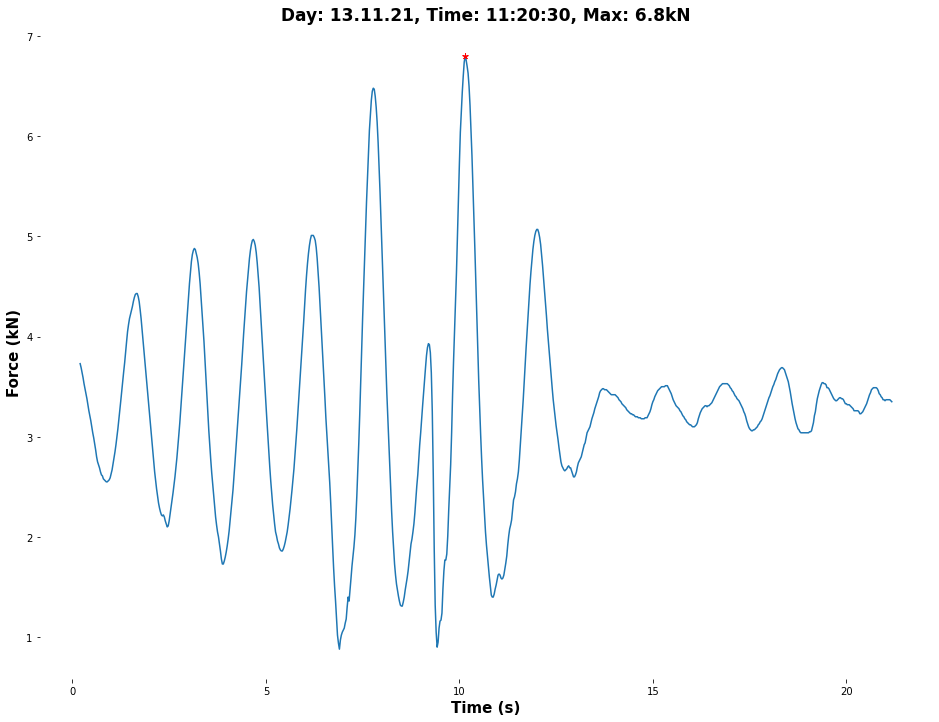

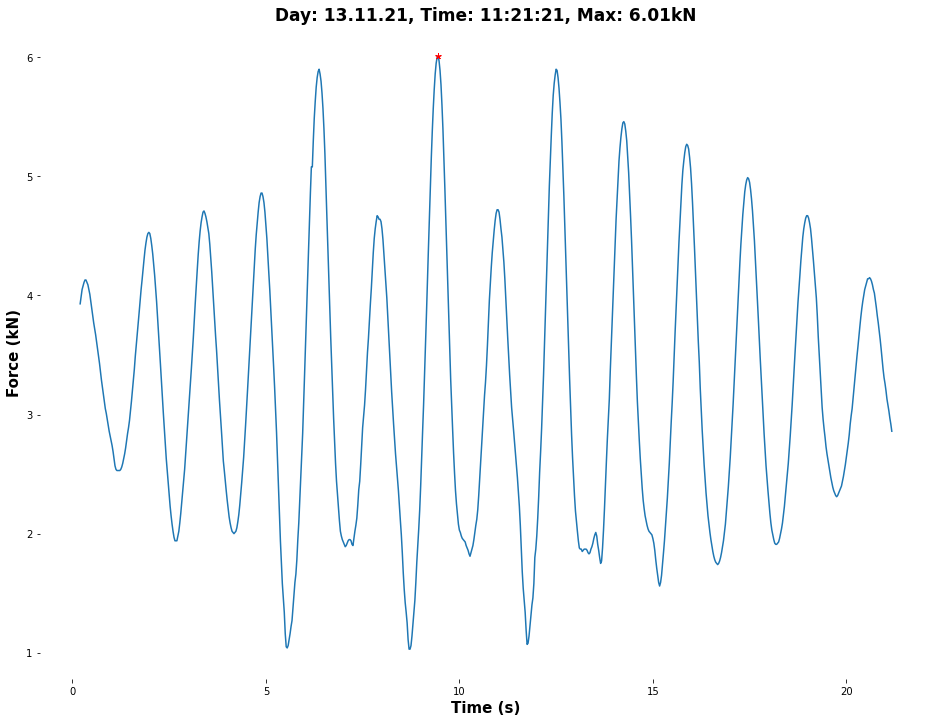

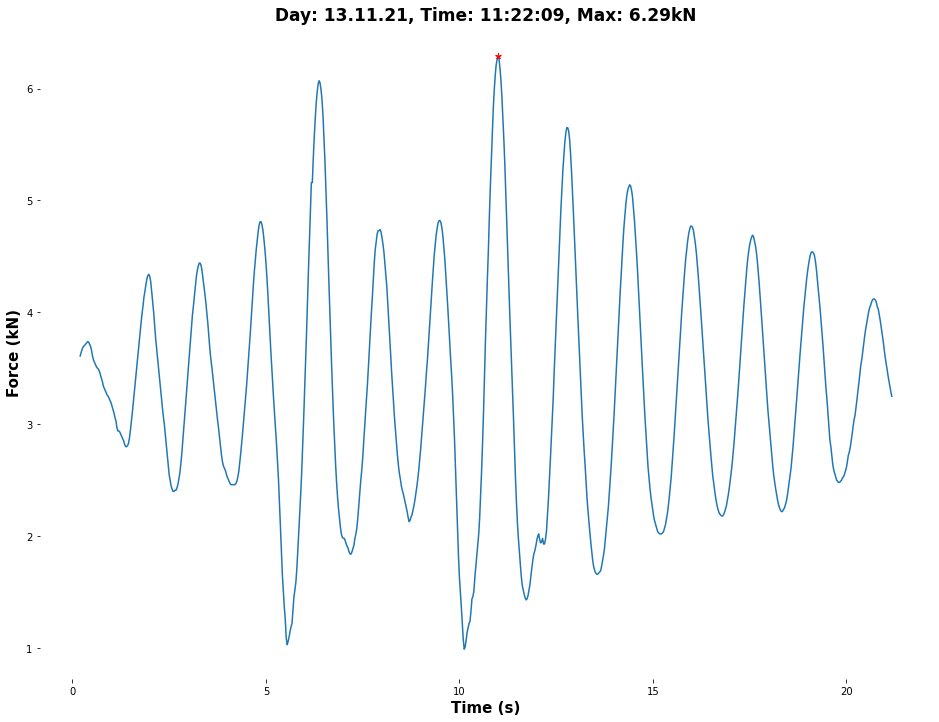

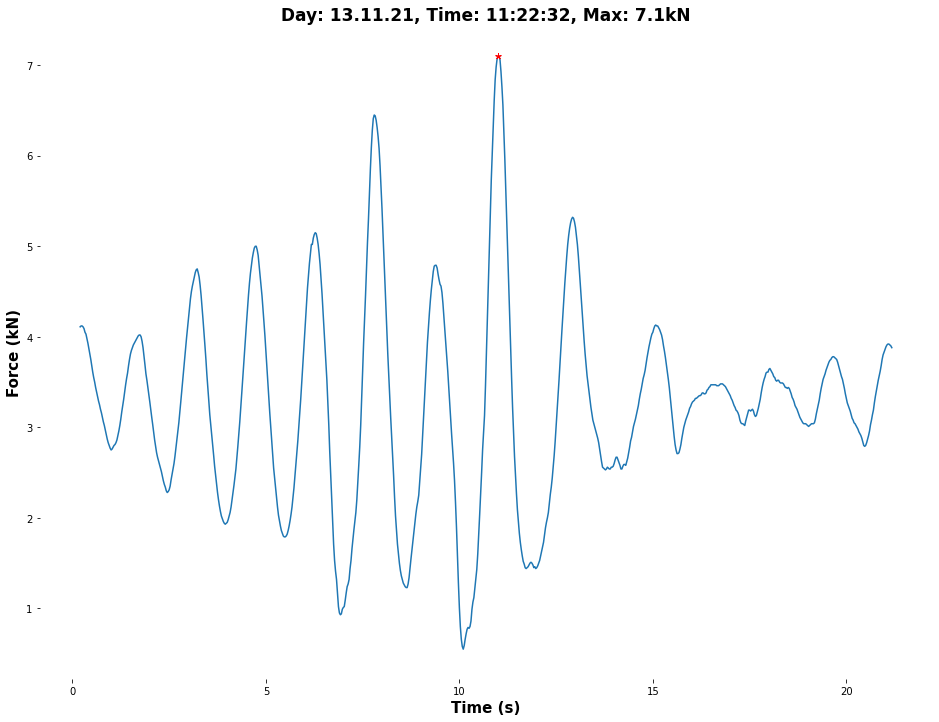

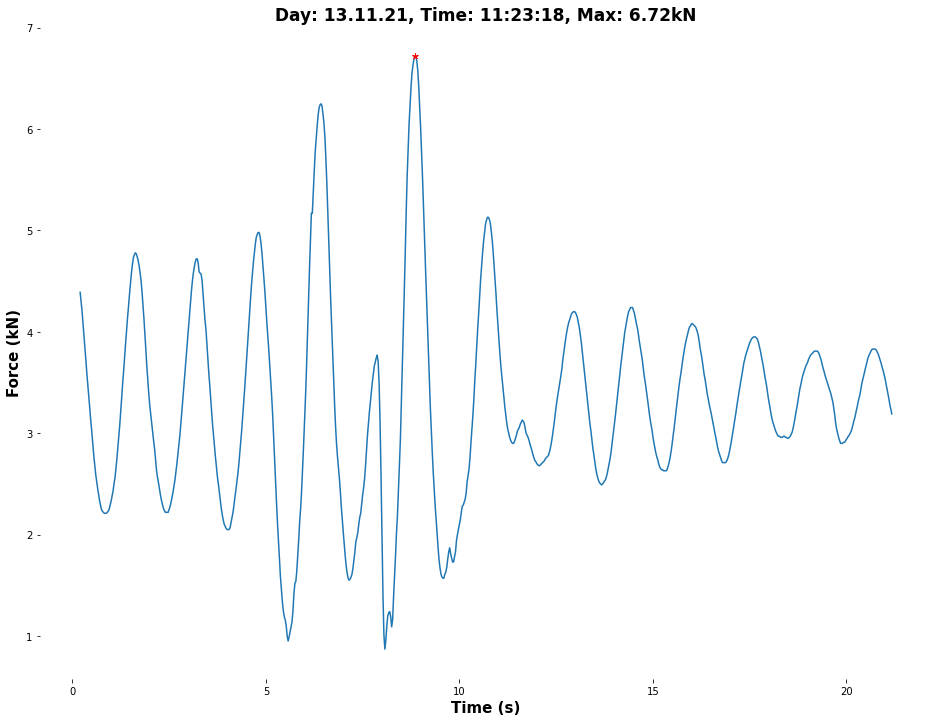

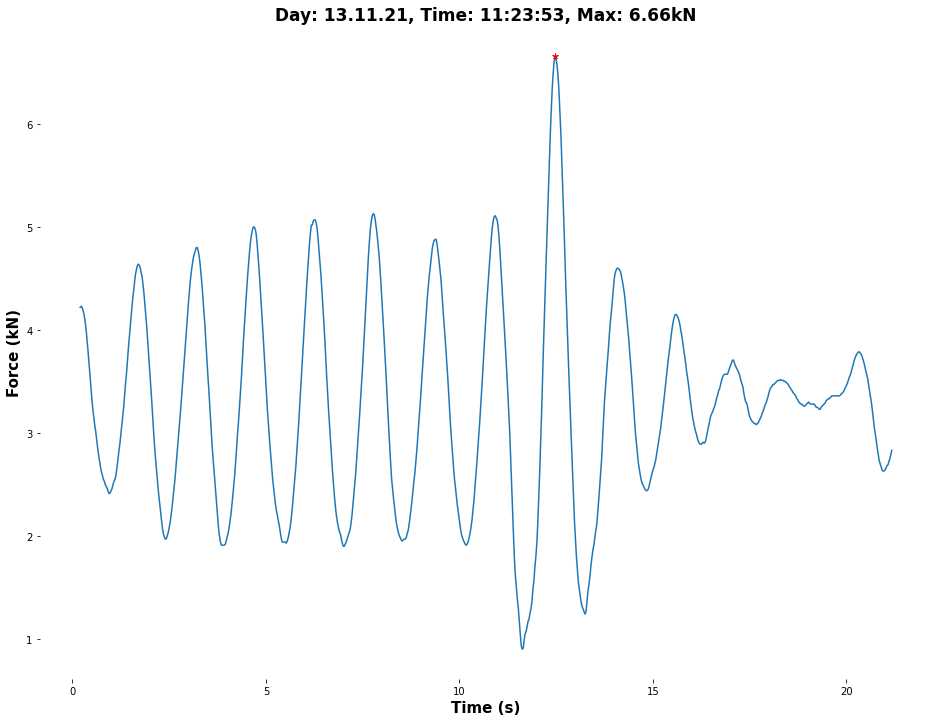

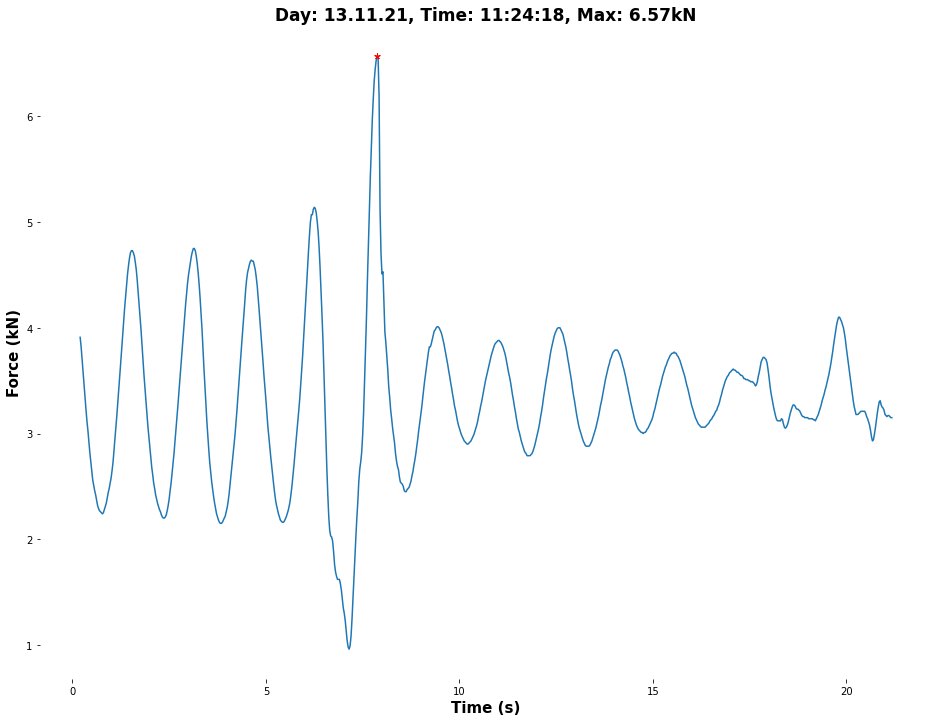

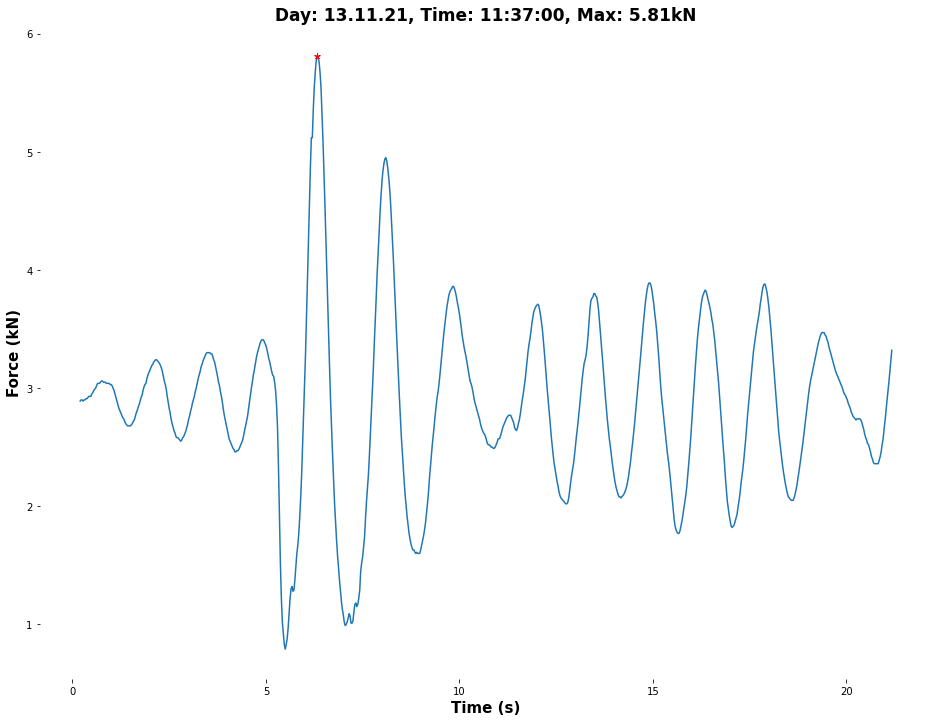

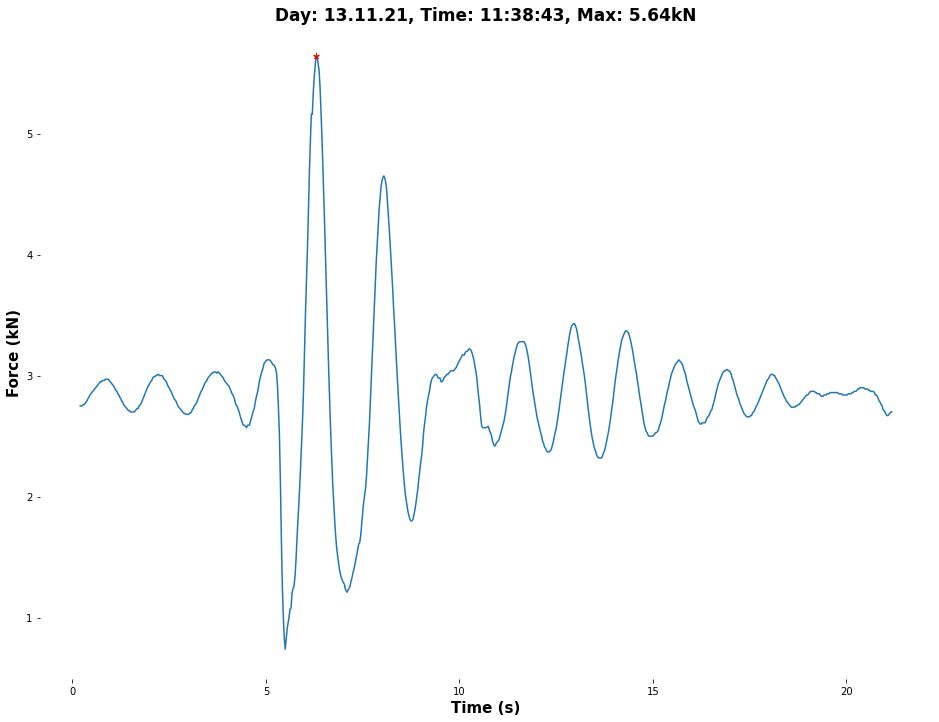

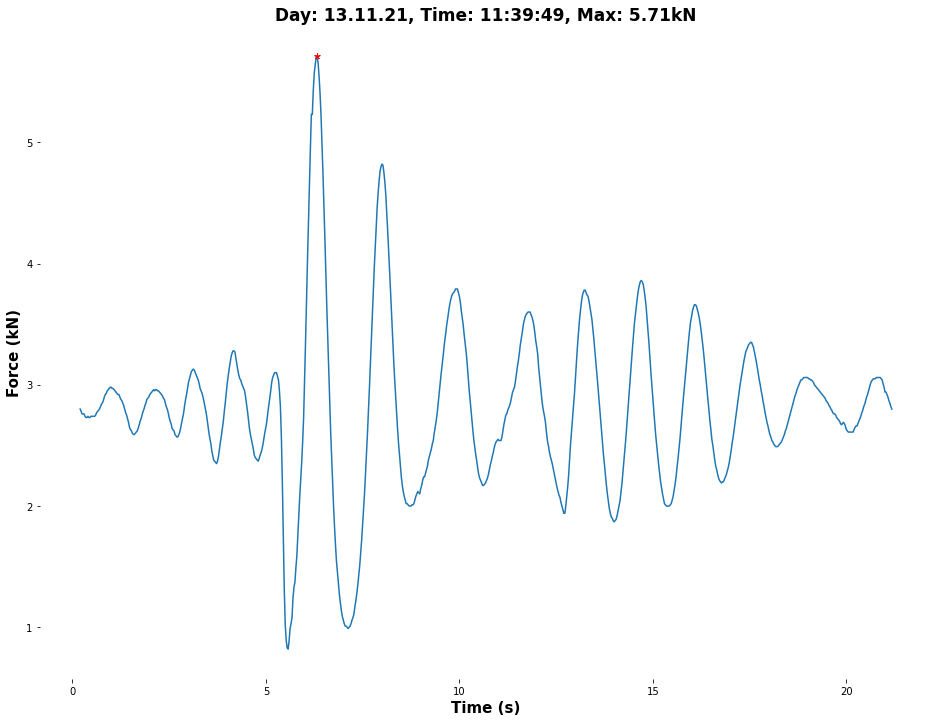

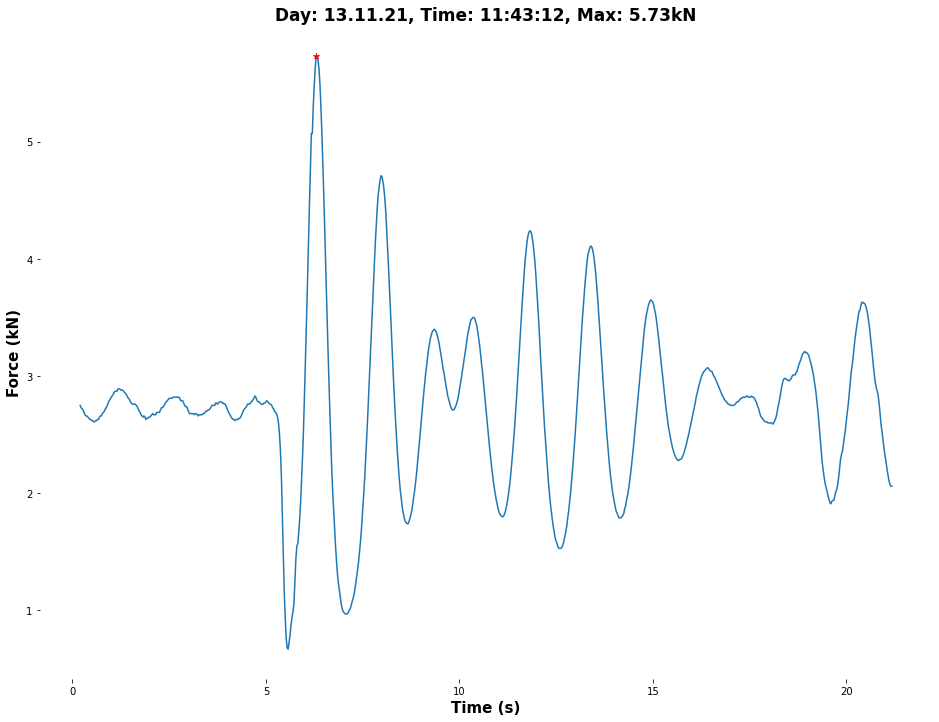

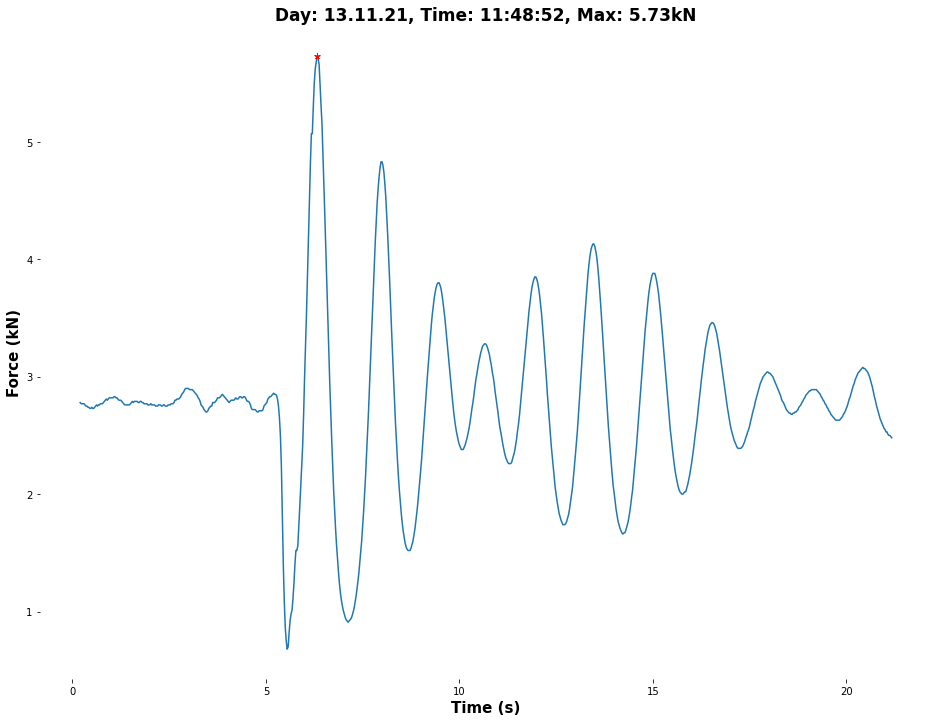

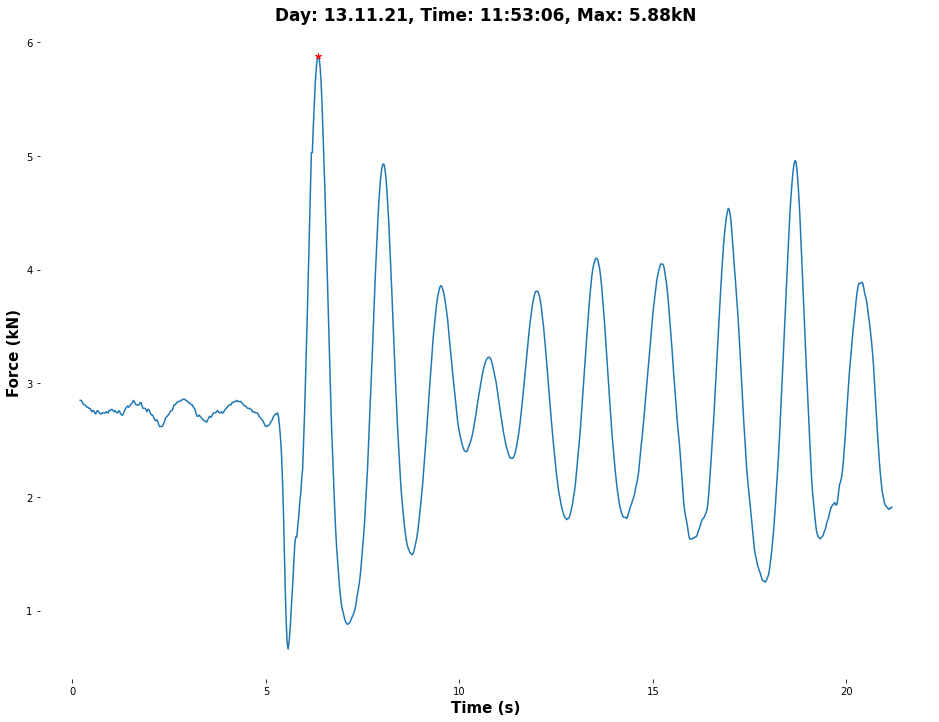

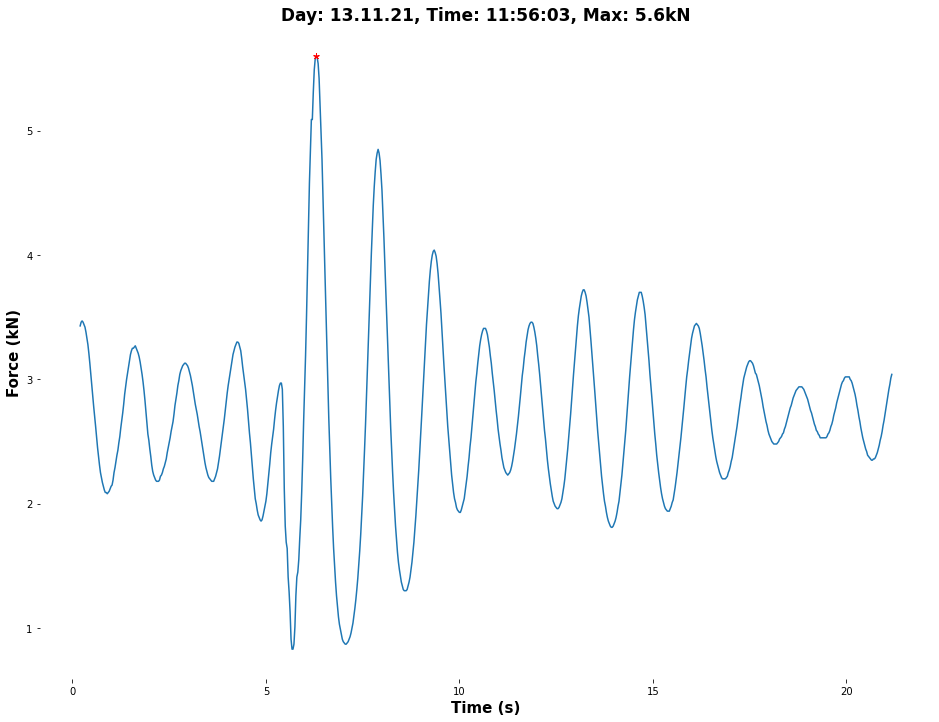

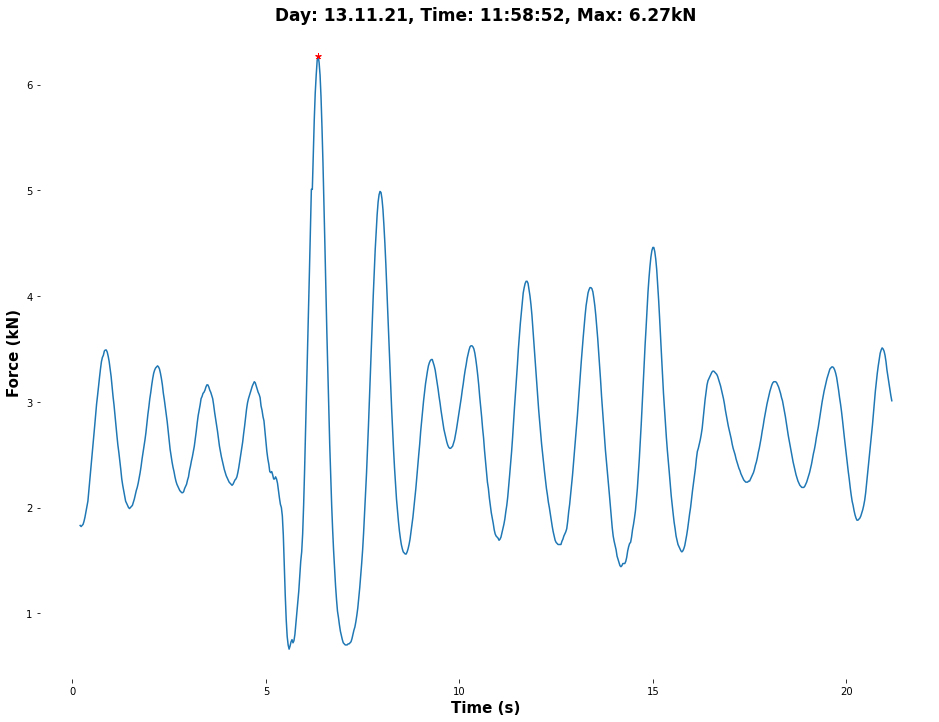

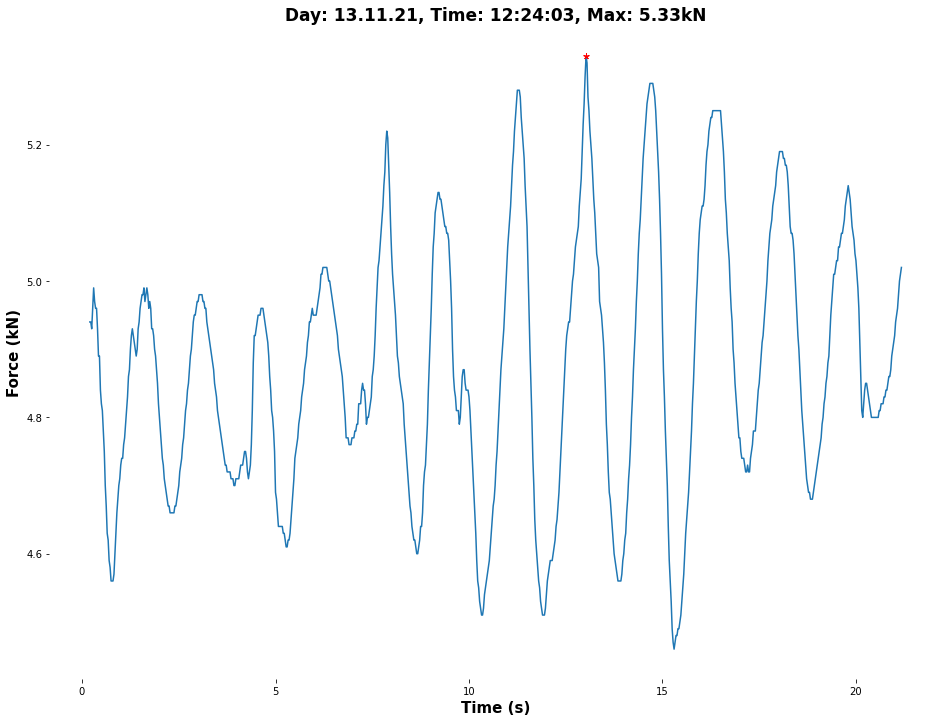

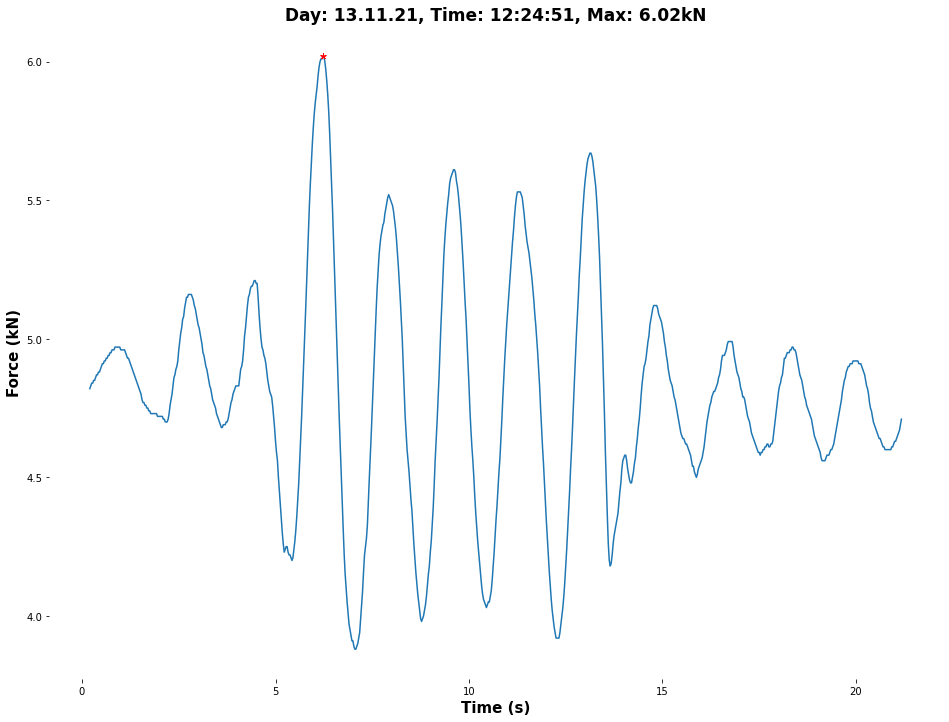

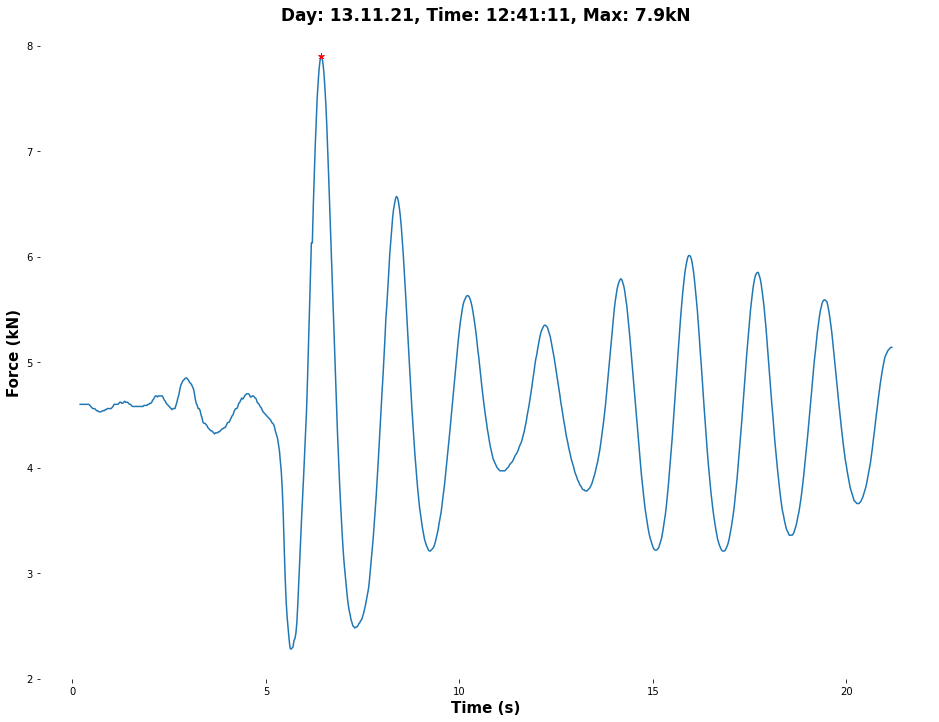

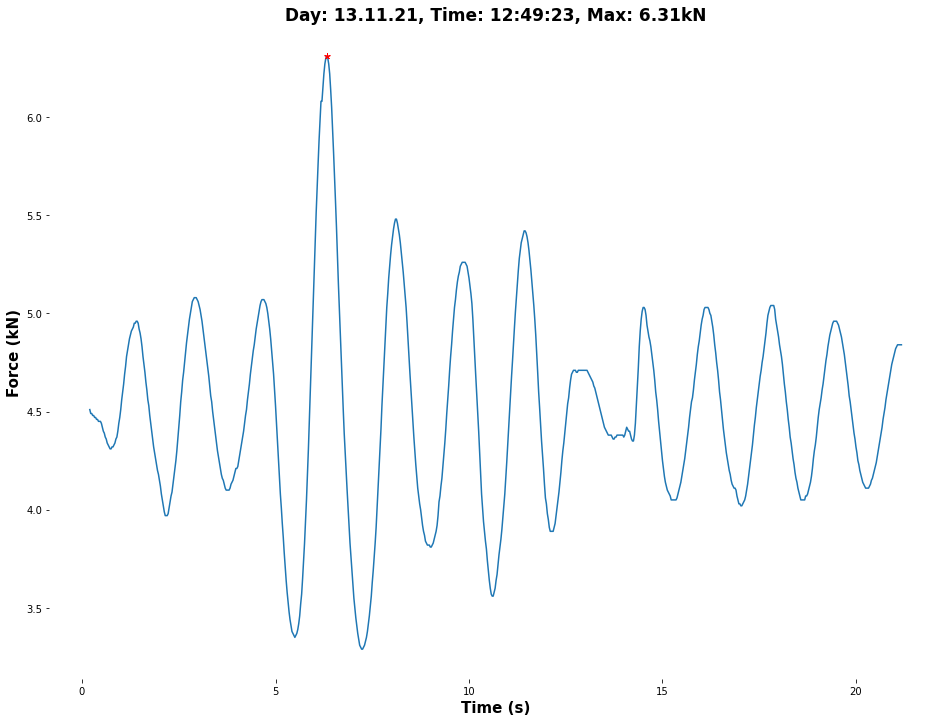

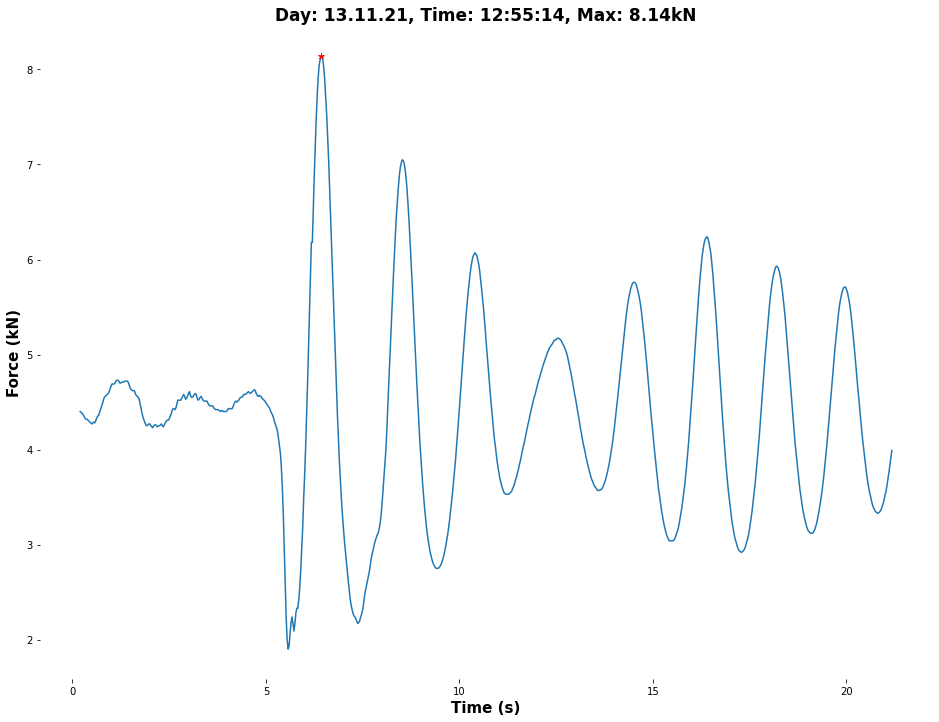

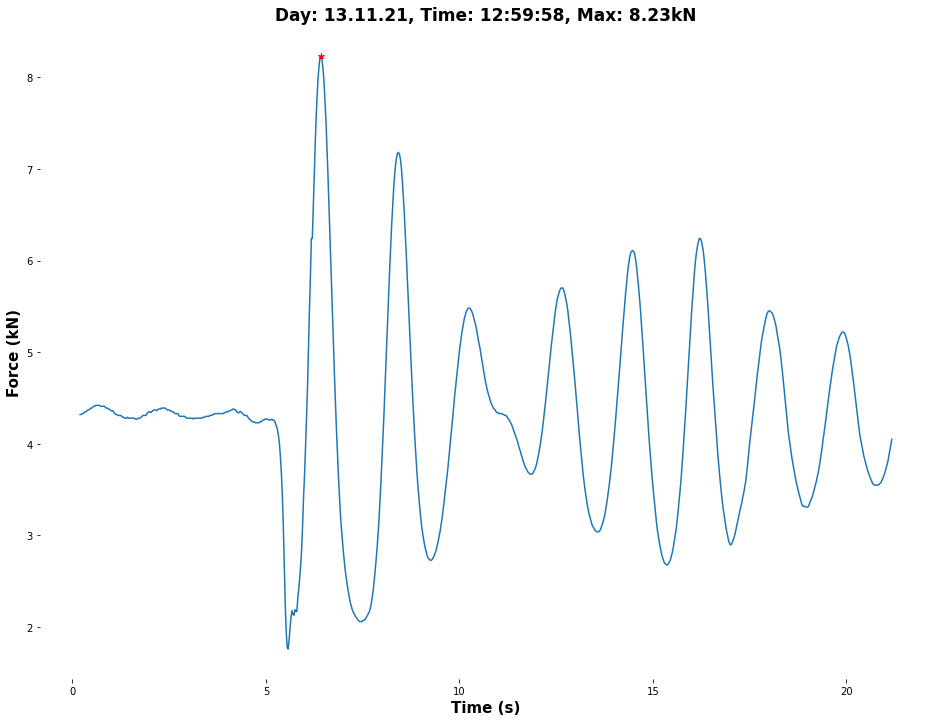

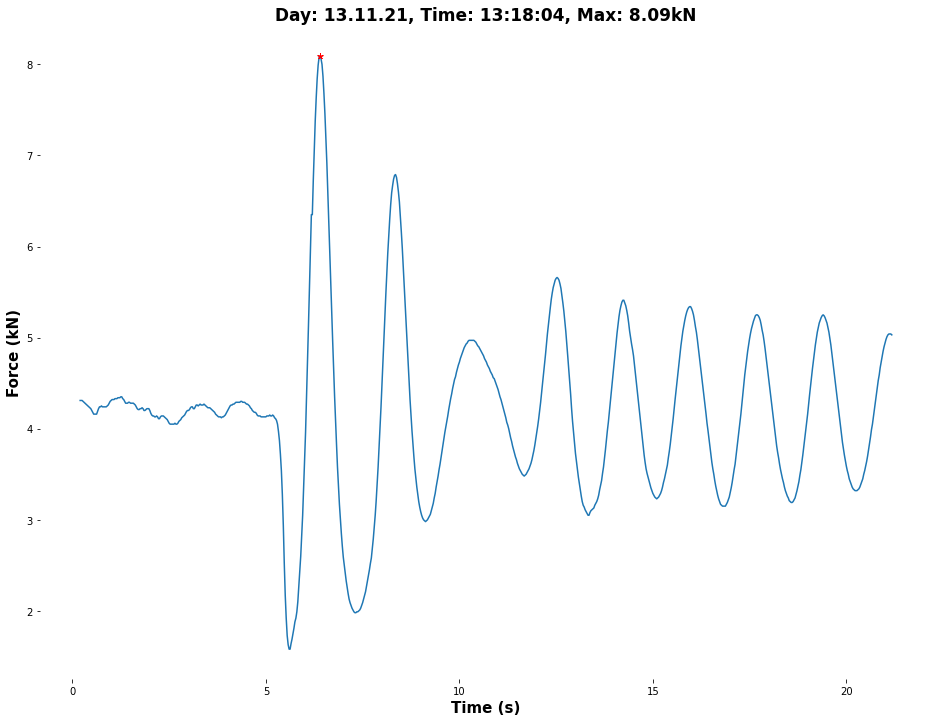

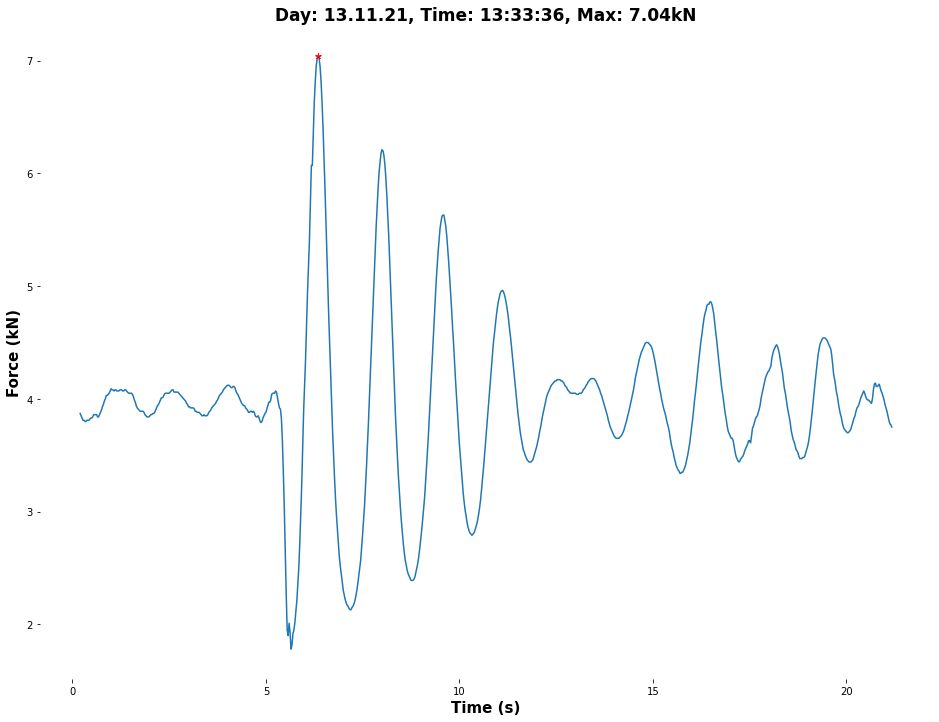

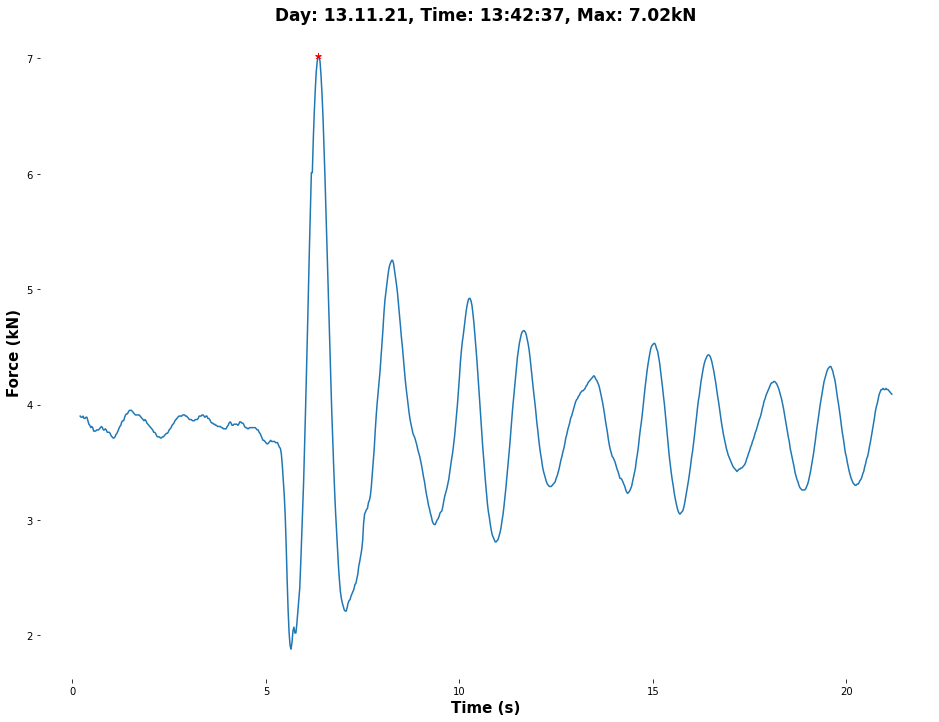

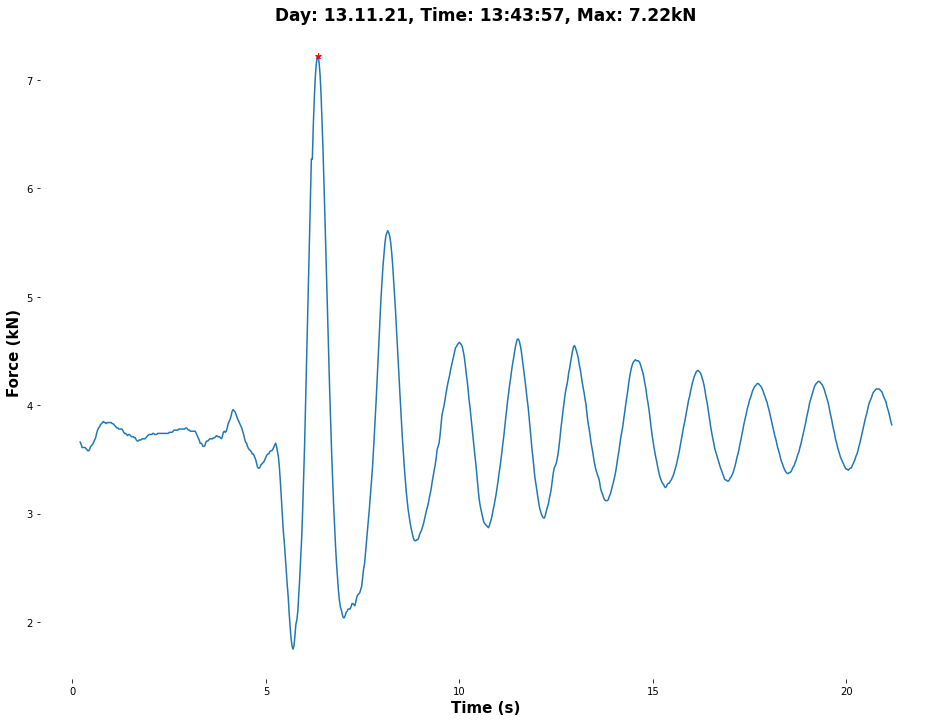

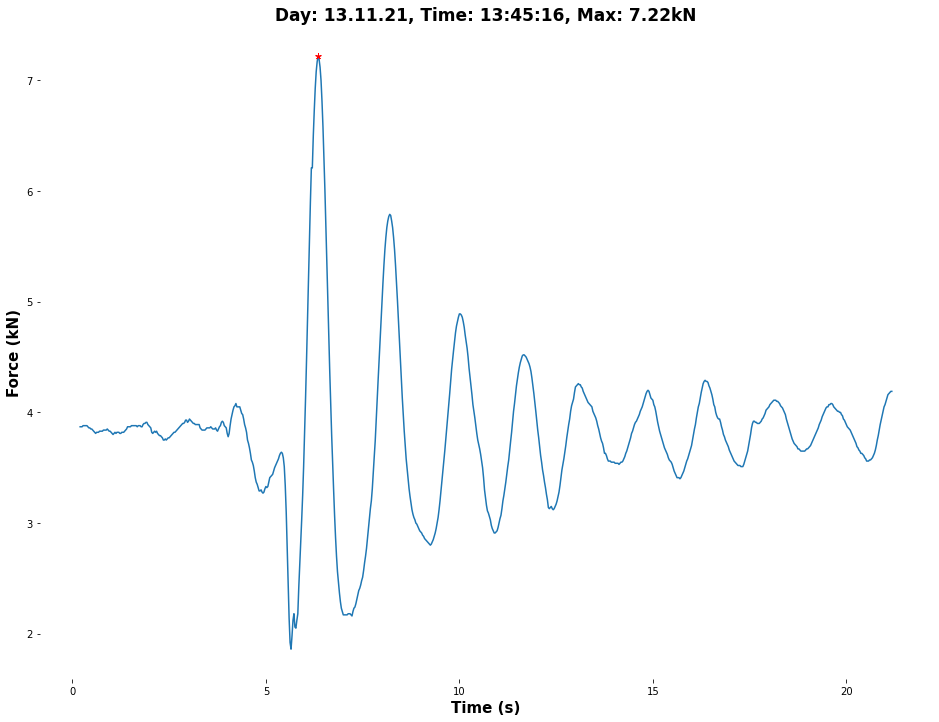

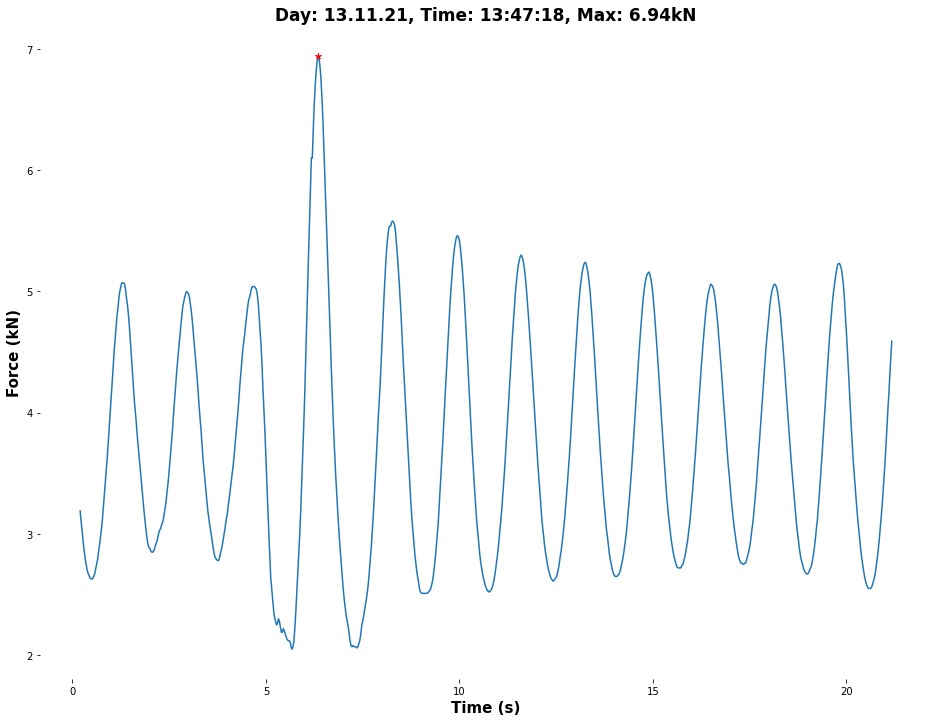

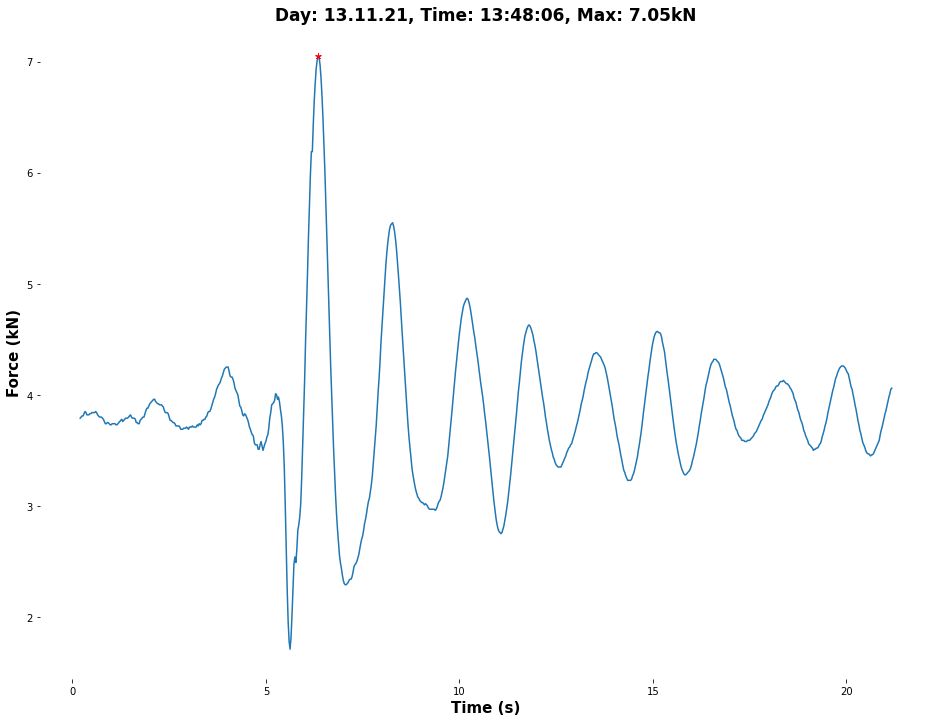

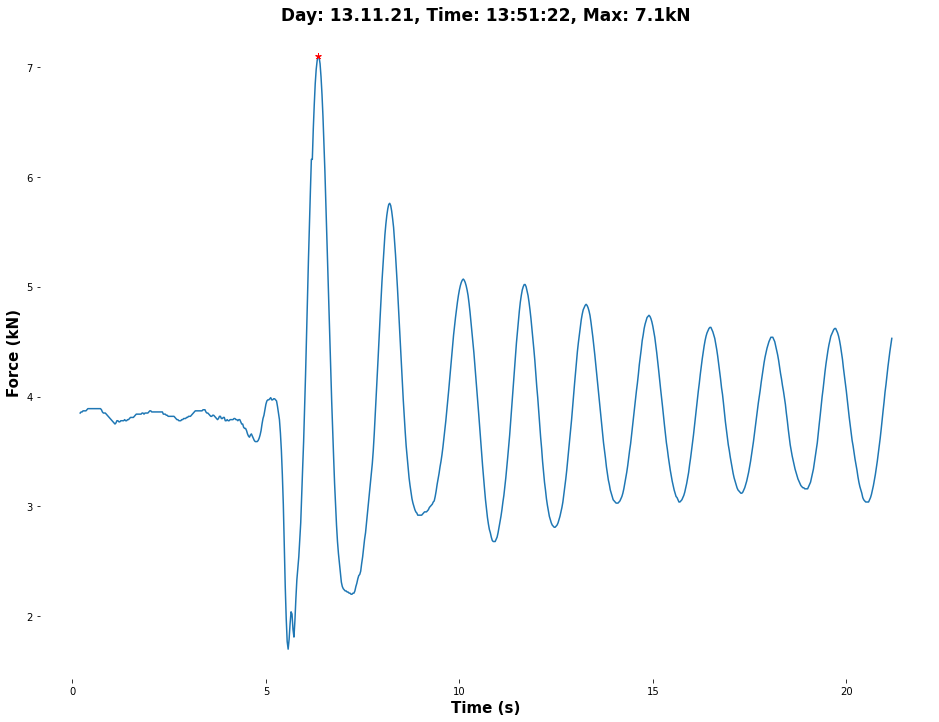

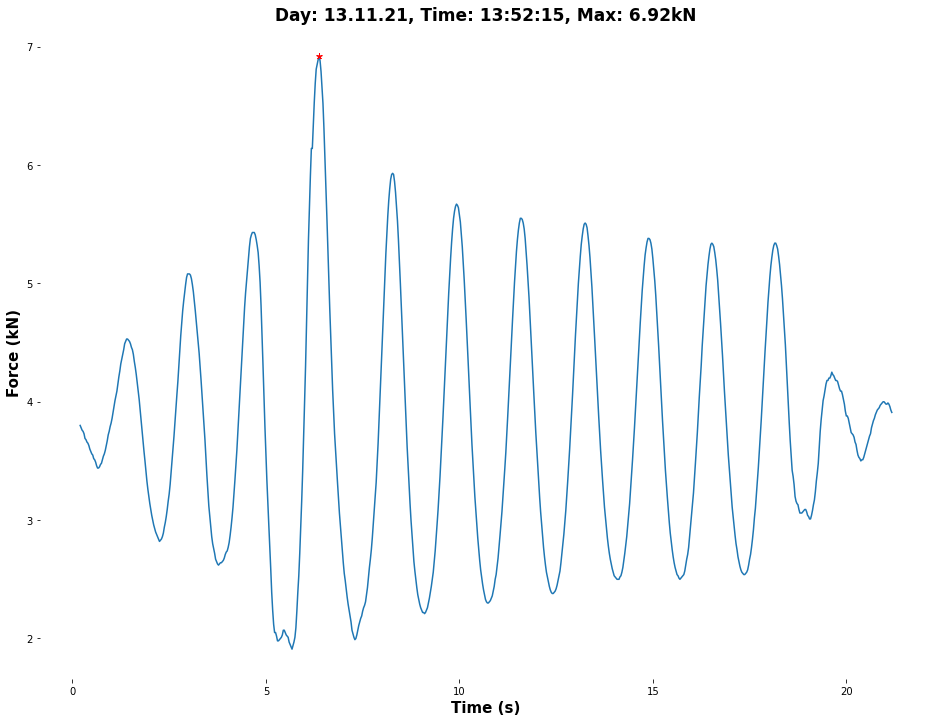

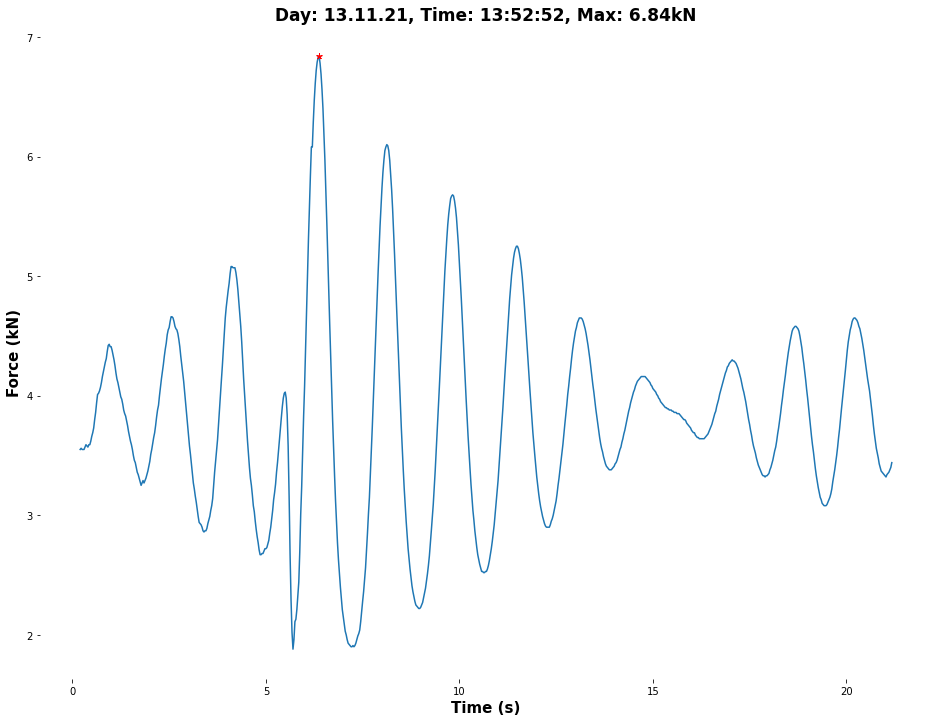

In [9]:
for i in df10.columns:
    plot_kN(df10, nums10, i)

for i in df40.columns:
    plot_kN(df40, nums40, i)
    
for i in df640.columns:
    plot_kN(df440, nums640, i)
    
for i in df1280.columns:
    plot_kN(df1280, nums1280, i)

In [10]:
# Write to excel file
with pd.ExcelWriter('Master.xlsx') as writer:
    df10.to_excel(writer, sheet_name = '10Hz Measurements')
    df40.to_excel(writer, sheet_name = '40Hz Measurements')
    df640.to_excel(writer, sheet_name = '640Hz Measurements')
    df1280.to_excel(writer, sheet_name = '1280Hz Measurements')